# Machine learning -  SMOTE Imbalance

![](img/1353.jpg)

<a href="https://br.freepik.com/vetores-gratis/pagina-de-destino-isometrica-de-seguranca-de-cartao-de-credito-robo_7588634.htm#query=machine%20learning%20credit&position=35&from_view=search&track=ais&uuid=f564bf38-b380-4976-b5b7-ef8c82b91fa6">Imagem de upklyak</a> no Freepik

In [1]:
# Importação das bibliotecas 

# Bibliotecas sistema
import re
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 

# Visualização de dados
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuração para os gráficos largura e layout dos graficos
sns.set_theme(style='whitegrid')
palette='viridis'

plt.rcParams["figure.figsize"] = (20, 10)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 15
m.rcParams['xtick.labelsize'] = 15
m.rcParams['ytick.labelsize'] = 15
m.rcParams['text.color'] = 'k'

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print()
print('Versão python neste Jupyter Notebook:', python_version())
print()

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions


Versão python neste Jupyter Notebook: 3.8.18

Author: Versões das bibliotecas

plotly    : 5.18.0
numpy     : 1.24.4
matplotlib: 3.6.0
seaborn   : 0.12.2
watermark : 2.4.3
re        : 2.2.1
pandas    : 1.5.3



# Dataset

In [2]:
# Carregando dataset
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Visualizando 5 primeiros dados
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Visualizando os 5 últimos dados
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Visualizando linhas e colunas 
data.shape

(284807, 31)

In [6]:
# Info dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Visualizando dados estatisticos com função T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
# Visualizando dados estatisticos
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Verificando existência de elementos nulos e NaNs
data.isna().sum().max()
data.isnull().sum().max()

0

In [10]:
print('Transacoes sem fraude:', data['Class'].value_counts()[0])
print('Transacoes com fraude:', data['Class'].value_counts()[1])
print()
print('Transacoes sem fraude:', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% da amostra simples')
print('Transacoes com fraude:', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% da amostra simples')

Transacoes sem fraude: 284315
Transacoes com fraude: 492

Transacoes sem fraude: 99.83 % da amostra simples
Transacoes com fraude: 0.17 % da amostra simples


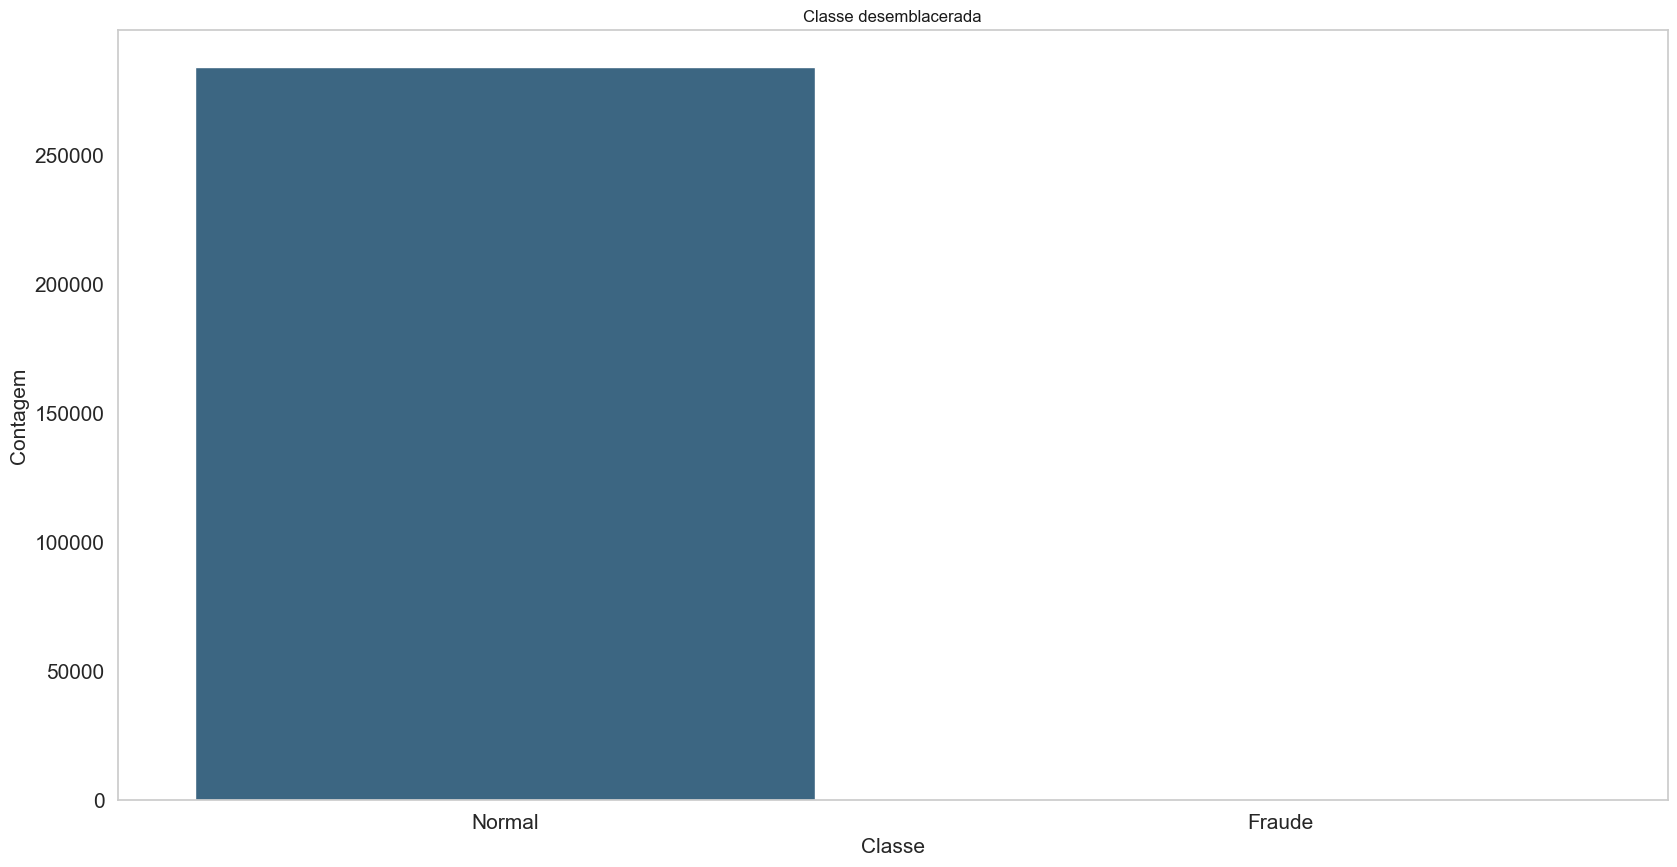

In [11]:
# Função para converter a variável binária classe para string
def ana_fraud(data):
    if (data == 0):
        return "Normal"
    else:
        return "Fraude"

# Copy dados
data_temp = data.copy()
data_temp["Class"] = data_temp["Class"].apply(ana_fraud)

# Gráfico barra
sns.countplot(data_temp, x="Class", palette='viridis')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title("Classe desemblacerada")
plt.grid(False)
del data_temp

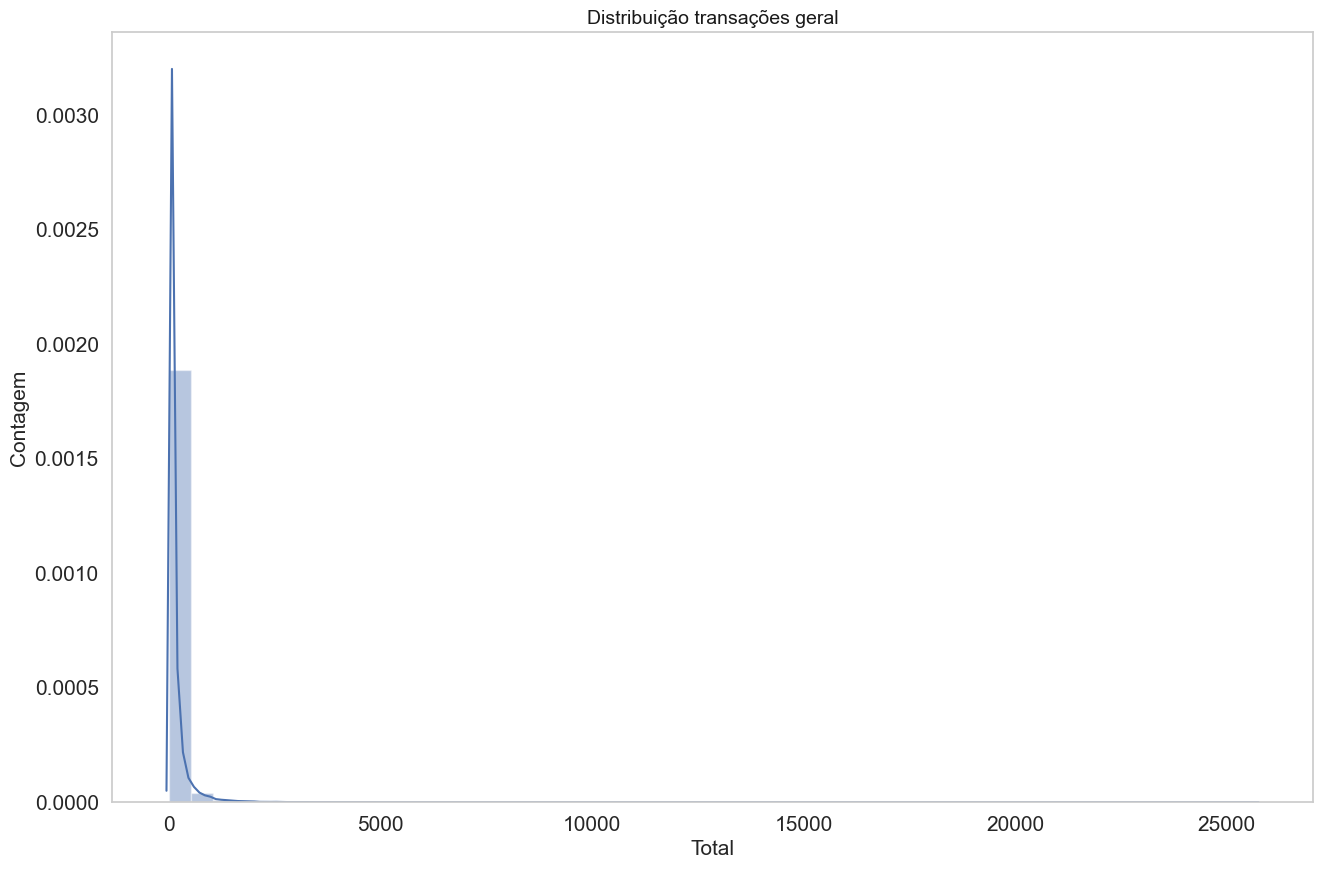

In [12]:
plt.figure(figsize=(15.5,10))
sns.distplot(data.Amount)
plt.title("Distribuição transações geral", fontsize=14)
plt.xlabel('Total')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

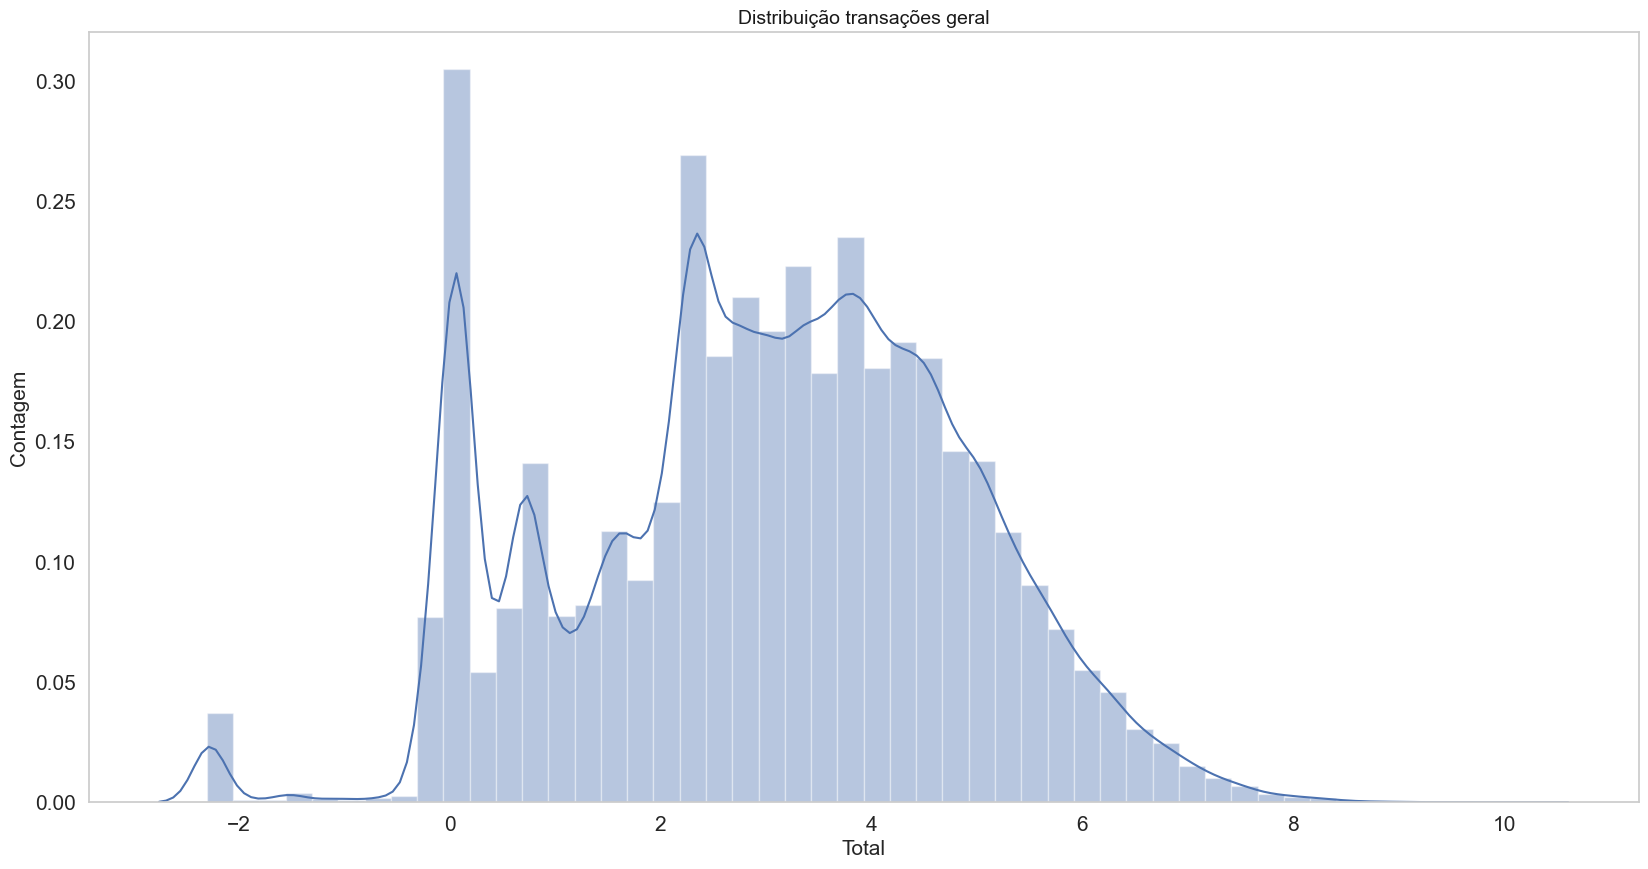

In [13]:
sns.distplot(np.log(data.Amount + 0.1))
plt.title("Distribuição transações geral", fontsize=14)
plt.xlabel('Total')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

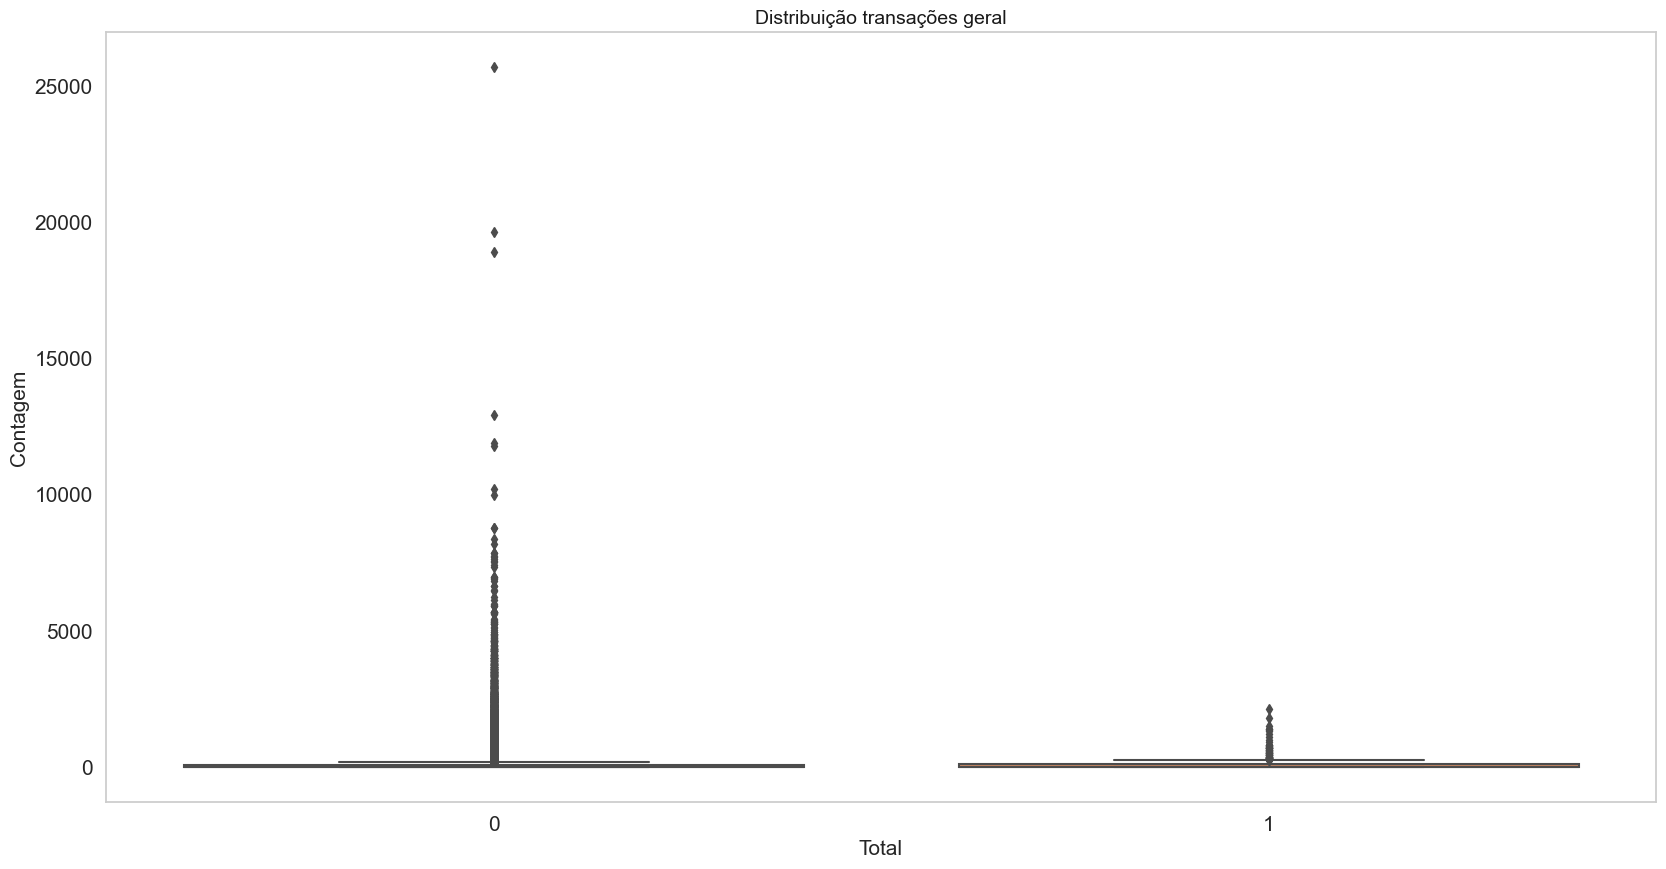

In [14]:
sns.boxplot(x ="Class",y="Amount", data=data)
plt.title("Distribuição transações geral",fontsize=14)
plt.xlabel('Total')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

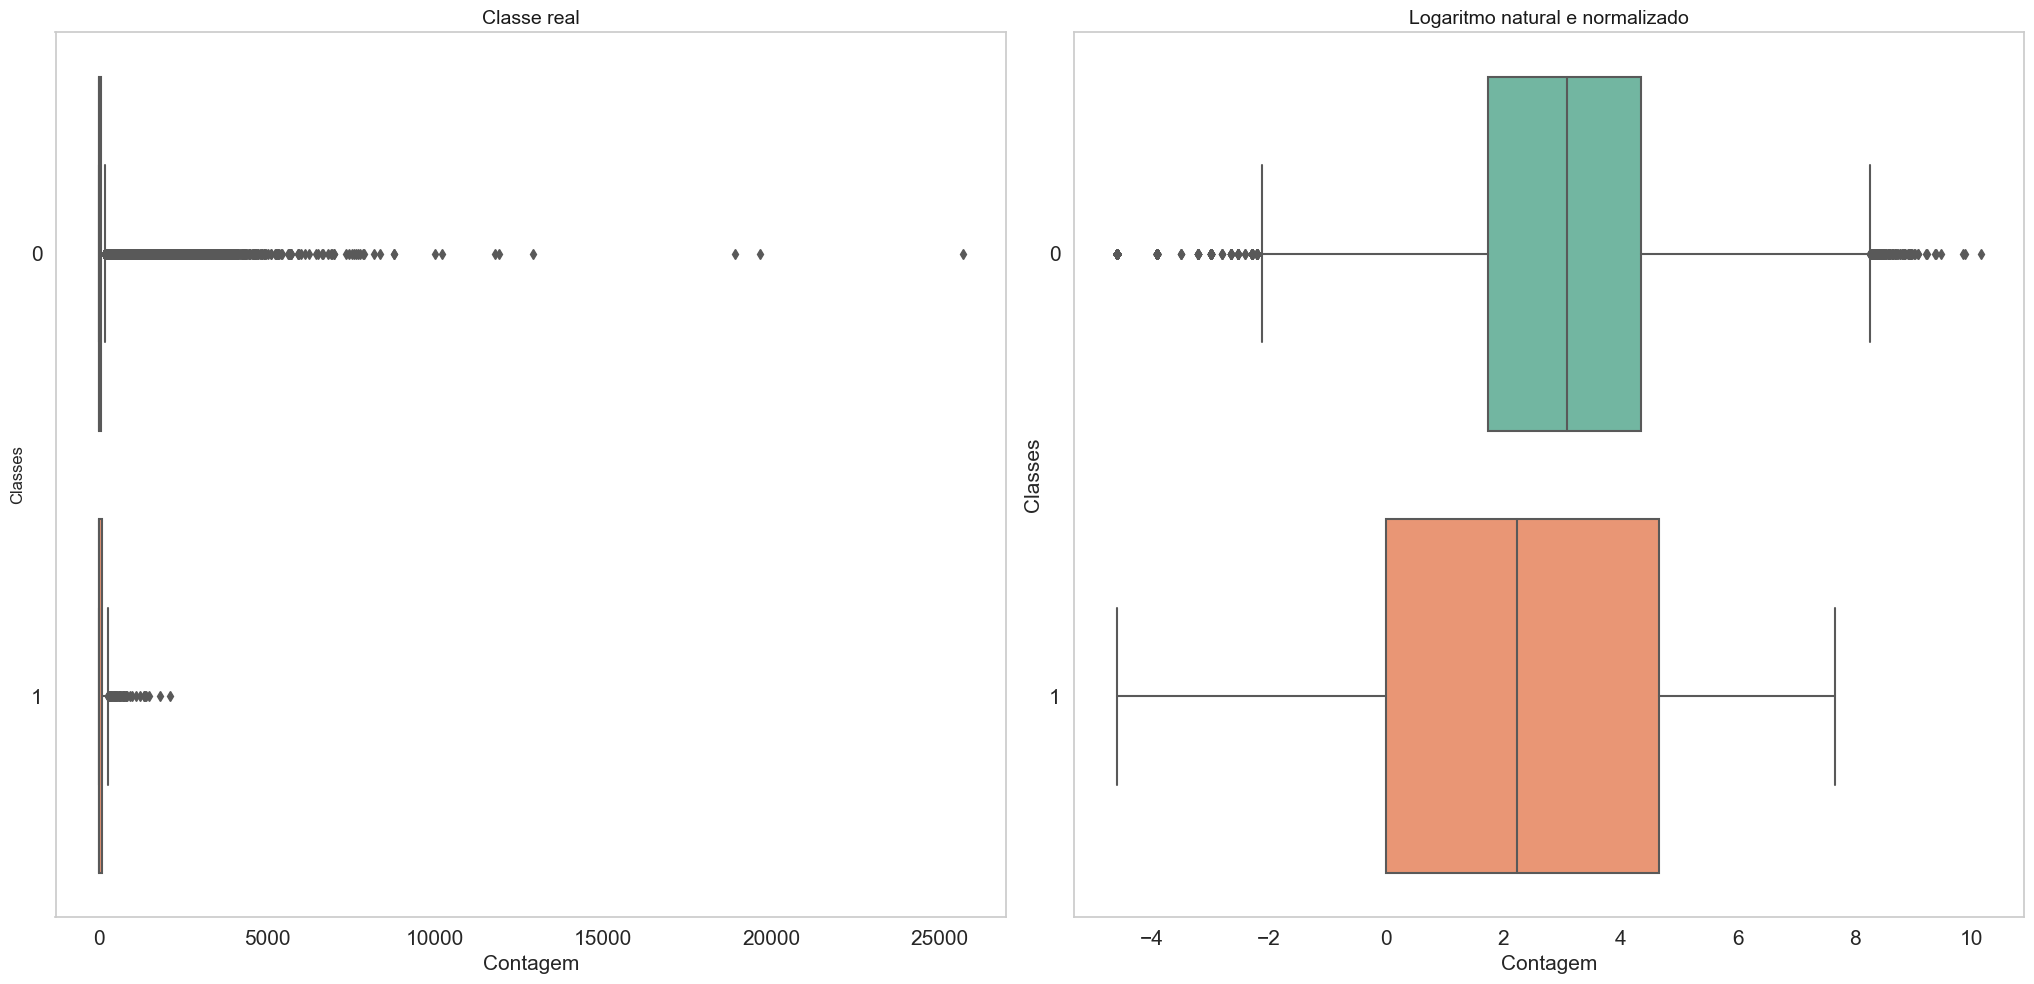

In [15]:
# Grafico com cálcula o logaritmo natural de cada valor presente na coluna Amount.

plt.figure(figsize=(20.5, 10))

plt.subplot(121)
ax = sns.boxplot(y="Class", x="Amount", data=data, orient="h", palette="Set2")
ax.set_title("Classe real", fontsize=14)
ax.set_xlabel("Contagem")
ax.set_ylabel("Classes", fontsize=12)
plt.grid(False)

plt.subplot(122)
ax1 = sns.boxplot(y="Class", x=np.log(data.Amount), data=data, orient="h", palette="Set2")
ax1.set_title("Logaritmo natural e normalizado", fontsize=14)
ax1.set_xlabel("Contagem")
ax1.set_ylabel("Classes")
plt.grid(False)

plt.tight_layout()
plt.show()

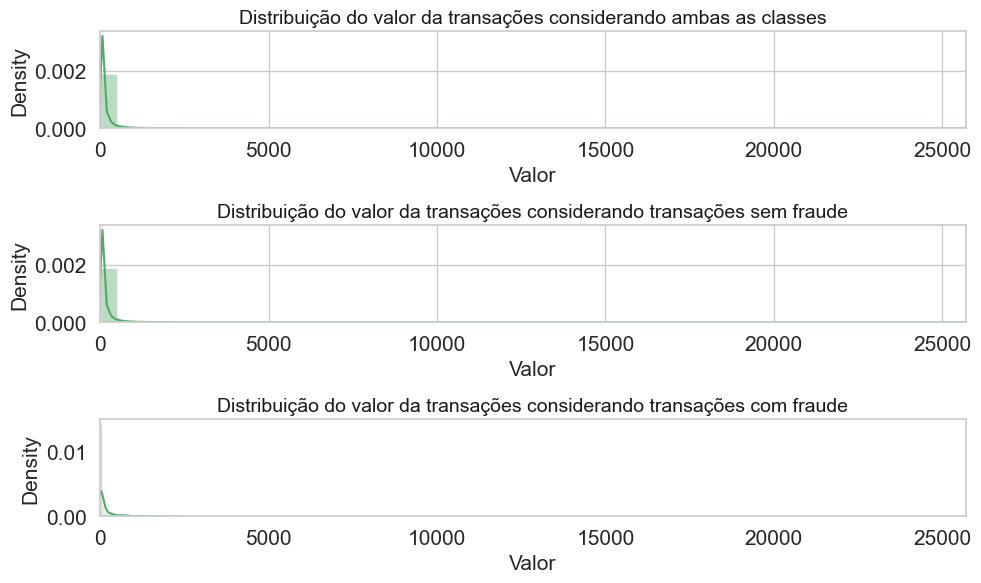

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
sns.distplot(data['Amount'], ax=ax[0], color='g')
ax[0].set_title('Distribuição do valor da transações considerando ambas as classes', fontsize=14)
ax[0].set_xlim([min(data['Amount']), max(data['Amount'])])
ax[0].set_xlabel('Valor')

sns.distplot(data[data['Class']==0]['Amount'], ax=ax[1], color='g')
ax[1].set_title('Distribuição do valor da transações considerando transações sem fraude', fontsize=14)
ax[1].set_xlim([min(data['Amount']), max(data['Amount'])])
ax[1].set_xlabel('Valor')

sns.distplot(data[data['Class']==1]['Amount'], ax=ax[2], color='g')
ax[2].set_title('Distribuição do valor da transações considerando transações com fraude', fontsize=14)
ax[2].set_xlim([min(data['Amount']), max(data['Amount'])])
ax[2].set_xlabel('Valor')
plt.grid(False)

plt.tight_layout()

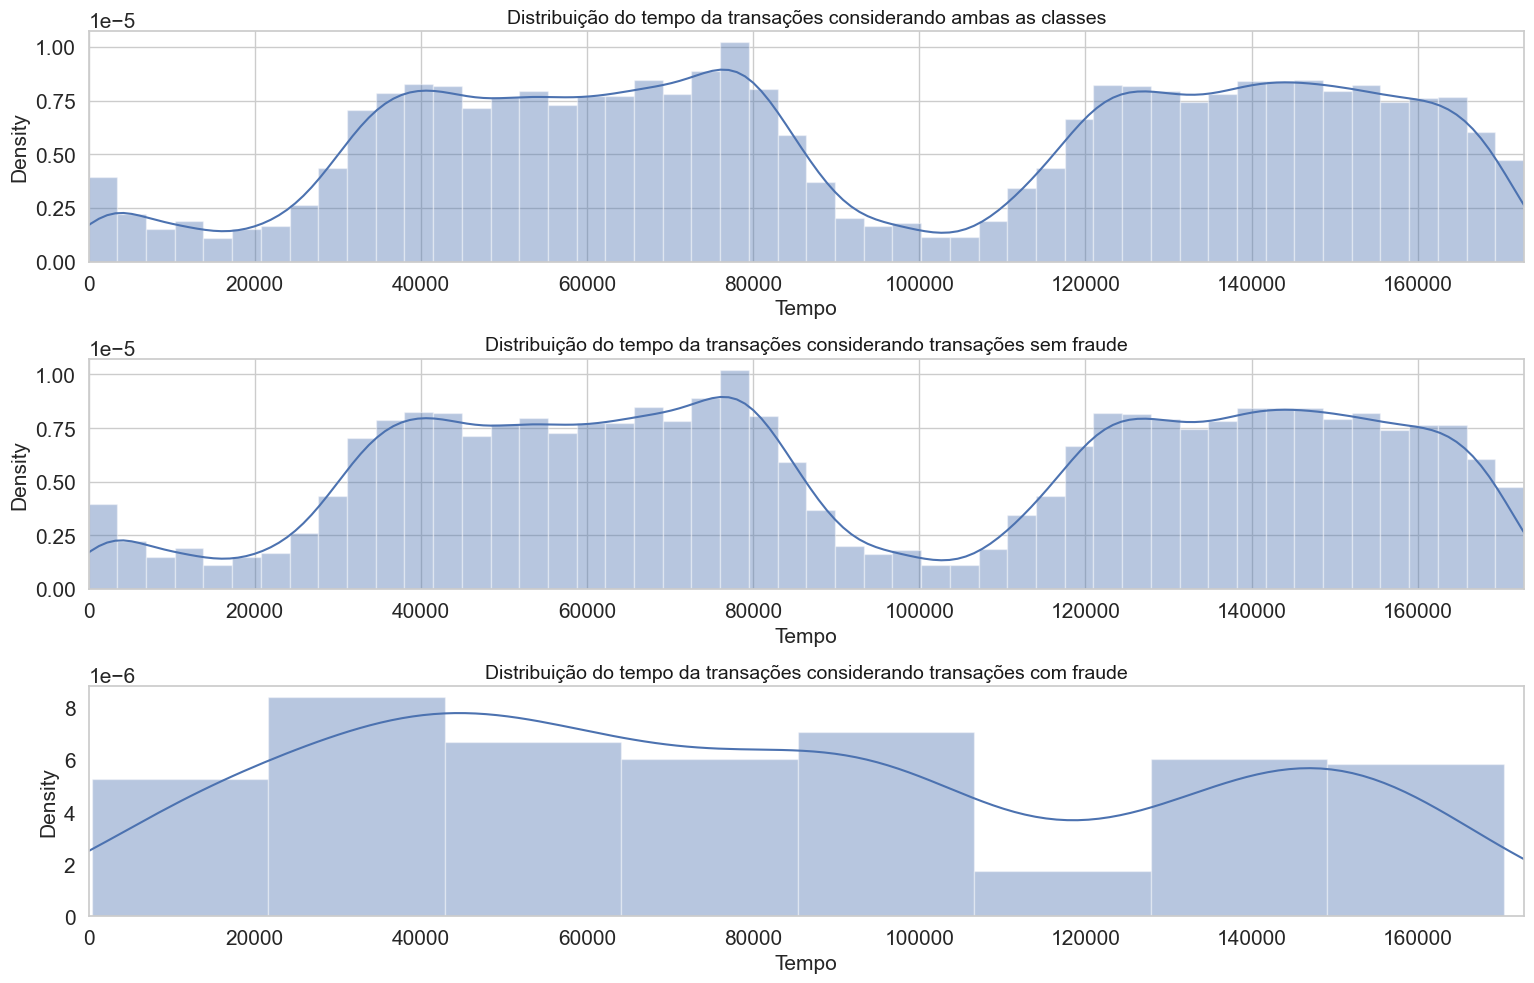

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(15.5, 10))
sns.distplot(data['Time'], ax=ax[0])
plt.grid(False)
ax[0].set_title('Distribuição do tempo da transações considerando ambas as classes', fontsize=14)
ax[0].set_xlim([min(data['Time']), max(data['Time'])])
ax[0].set_xlabel('Tempo')

sns.distplot(data[data['Class']==0]['Time'], ax=ax[1])
ax[1].set_title('Distribuição do tempo da transações considerando transações sem fraude', fontsize=14)
ax[1].set_xlim([min(data['Time']), max(data['Time'])])
ax[1].set_xlabel('Tempo')

sns.distplot(data[data['Class']==1]['Time'], ax=ax[2])
ax[2].set_title('Distribuição do tempo da transações considerando transações com fraude', fontsize=14)
ax[2].set_xlim([min(data['Time']), max(data['Time'])])
ax[2].set_xlabel('Tempo')

plt.tight_layout()

## 1.1) Indentificação de outliers

As variáveis Amount e Time exibem uma considerável variabilidade e não estão normalizadas. Diante disso, optamos por aplicar a normalização a ambas as variáveis, utilizando o RobustScaler, uma técnica menos sensível a valores extremos (outliers). Essa abordagem nos permitirá ajustar os dados de forma mais robusta, preservando a distribuição e minimizando o impacto dos valores discrepantes durante o processo de normalização

# Feature Engineering
Praticamente todos os algoritmos de Aprendizado de Máquina possuem entradas e saídas. As entradas são formadas por colunas de dados estruturados, onde cada coluna recebe o nome de feature, também conhecido como variáveis independentes ou atributos. Essas features podem ser palavras, pedaços de informação de uma imagem, etc. Os modelos de aprendizado de máquina utilizam esses recursos para classificar as informações. Por exemplo, sedentarismo e fator hereditário são variáveis independentes para quando se quer prever se alguém vai ter câncer ou não

As saídas, por sua vez, são chamadas de variáveis dependentes ou classe, e essa é a variável que estamos tentando prever. O nosso resultado pode ser 0 e 1 correspondendo a 'Não' e 'Sim' respectivamente, que responde a uma pergunta como: "Fulano é bom pagador?" ou a probabilidade de alguém comprar um produto ou não.

In [18]:
# Dataset não normalizado
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
# Importando biblioteca
from sklearn.preprocessing import StandardScaler, RobustScaler

# Criando um objeto
pre_scaler = RobustScaler()

# Treinamento
data['Amount'] = pre_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = pre_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Visualizando
pre_scaler

RobustScaler()

In [20]:
# Visualizando dataset novo normalizado
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [21]:
# Salvando dataset normalizado
data.to_csv("dataset_normalizado.csv")

In [22]:
# Divisão treino teste
x = data.drop(['Class'],axis=1)
y = data['Class']

In [23]:
# Visualizando dados x
x.shape

(284807, 30)

## 1.2) Validação cruzada 


**KFold:** É um método de validação cruzada que divide o conjunto de dados em k subconjuntos (também conhecidos como "folds") de tamanhos iguais. O algoritmo é treinado k vezes, usando um dos subconjuntos como conjunto de teste em cada iteração e os restantes como conjunto de treinamento. Em resumo, o conjunto de dados é dividido em k partes e o modelo é treinado k vezes, cada vez utilizando uma parte diferente como conjunto de teste e as outras partes como conjunto de treinamento.



**StratifiedKFold:** É uma variação do KFold que leva em consideração a distribuição das classes nos dados. Em conjuntos de dados desbalanceados, ou seja, quando há um número significativamente diferente de exemplos para cada classe, o StratifiedKFold garante que a proporção entre as classes seja mantida em cada dobra. Isso é importante para garantir que cada dobra seja representativa da distribuição global das classes, reduzindo o viés na validação cruzada.


Em resumo, o KFold é uma técnica de validação cruzada padrão que divide os dados em subconjuntos de tamanho igual, enquanto o StratifiedKFold é uma versão do KFold que mantém a proporção entre as classes em cada dobra, sendo especialmente útil em conjuntos de dados desbalanceados.

In [24]:
## Dados com balanceada da amostra

# Importando biblioteca
from sklearn.model_selection import KFold, StratifiedKFold

# Criando um objeto
stratified_k_fold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Percorrendo dados
for x_train, y_test in stratified_k_fold.split(x, y):
    print('Treinamento: \n')
    print('-' * 100)
    print("Treinamento dados:", x_train, "Treinamento teste", y_test)
    x_treino, x_teste = x.iloc[x_train], x.iloc[y_test]
    y_treino, y_teste = y.iloc[x_train], y.iloc[y_test]
    
# Visualizando dados treino teste
x_treino = x_treino.values
x_teste = x_teste.values
y_treino = y_treino.values
y_teste = y_teste.values
label_treino, label_contagem_y_treino = np.unique(y_treino, return_counts=True)
label_teste, label_contagem_x_teste = np.unique(y_teste, return_counts=True)
print('-' * 100)

print('Distruição das classes: \n')
print(label_contagem_y_treino/ len(y_treino))
print(label_contagem_x_teste/ len(y_teste))

Treinamento: 

----------------------------------------------------------------------------------------------------
Treinamento dados: [ 30473  30496  31002 ... 284804 284805 284806] Treinamento teste [    0     1     2 ... 57017 57018 57019]
Treinamento: 

----------------------------------------------------------------------------------------------------
Treinamento dados: [     0      1      2 ... 284804 284805 284806] Treinamento teste [ 30473  30496  31002 ... 113964 113965 113966]
Treinamento: 

----------------------------------------------------------------------------------------------------
Treinamento dados: [     0      1      2 ... 284804 284805 284806] Treinamento teste [ 81609  82400  83053 ... 170946 170947 170948]
Treinamento: 

----------------------------------------------------------------------------------------------------
Treinamento dados: [     0      1      2 ... 284804 284805 284806] Treinamento teste [150654 150660 150661 ... 227866 227867 227868]
Treinament

Nesta etapa, adotaremos o método de subamostragem aleatória para alcançar um equilíbrio nos dados, evitando o fenômeno conhecido como overfitting, que pode ser desencadeado por conjuntos de dados desbalanceados.

Ao identificarmos 492 transações classificadas como fraudulentas, procederemos selecionando aleatoriamente a mesma quantidade de transações não fraudulentas para assegurar um balanceamento na amostra. Posteriormente, efetuaremos a mistura dos dados, a fim de permitir que os modelos possam capturar os diferentes padrões existentes em ambos os tipos de transações. Essa abordagem visa garantir que o modelo seja treinado de maneira mais equilibrada, considerando tanto as transações comuns quanto as fraudulenta, o que pode resultar em uma melhor capacidade de generalização durante o processo de aprendizado

## 1.3) Análisando fraudes

In [25]:
# Amostra dados
data = data.sample(frac=1)
data_tamanho_fraude = len(data[data['Class']==1])

In [26]:
# Amostra de fraude
data_fraude = data.loc[data['Class'] == 1]
data_sem_fraude = data.loc[data['Class'] == 0][:data_tamanho_fraude]

# Concat novos dados
data_novos = pd.concat([data_fraude, data_sem_fraude])
data_novos = data_novos.sample(frac=1, random_state=42)

In [27]:
# Visualizando
data_novos

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258964,0.871780,1.813931,-0.339205,-2.056361,0.352029,0.414492,-0.497692,0.223451,-0.182322,1.000845,-0.914551,-0.832532,0.244356,0.167175,-1.492657,-0.012138,0.088189,0.938056,0.110541,0.197178,0.119198,-0.198910,-0.609751,0.059605,0.162736,-0.037981,-0.104971,-0.031358,0.002729,1.573395,0
154454,0.198604,0.913116,1.145381,-4.602878,2.091803,-0.473224,-2.085436,-1.671244,0.094397,0.337799,-4.431810,4.871980,-5.395221,1.332502,-4.603797,-0.777314,-2.571892,-3.003615,-0.225441,0.252274,0.508985,0.401416,-0.084933,-0.197684,-0.283271,0.387597,-0.553527,0.516274,0.270828,1.758821,1
121909,-0.097851,-0.705167,0.098955,2.037943,-0.326555,-1.654233,0.535217,-0.881121,0.684964,-1.454179,0.286505,0.697291,-0.241939,0.250828,-0.188950,0.448288,0.866760,0.773802,0.031927,2.709454,0.437846,0.481426,1.197829,-0.185738,0.068687,0.222456,0.241857,-0.017222,0.017725,0.796479,0
8845,-0.852888,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,-4.138891,5.149409,-11.124019,0.543068,-7.840942,0.743634,-6.777069,-9.931765,-4.093021,1.504925,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,0.117236,1
101509,-0.197782,-1.739334,-1.304655,0.314103,0.053740,-0.058696,0.071260,0.694862,-0.313270,-0.649377,0.517568,-1.356558,-0.238383,0.069579,-0.431690,-0.674724,-1.654162,-0.053961,0.520746,-1.554562,-1.463994,-0.665172,-0.632078,-0.421176,-0.400774,-0.001640,-0.495162,0.031633,0.066280,4.164047,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249167,0.817514,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,-4.441484,2.944375,-3.805469,-2.102227,-6.106183,-0.641736,-1.555963,-2.084067,0.394247,0.083380,3.189355,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,20.721442,1
50537,-0.471810,-0.234922,0.355413,1.972183,-1.255593,-0.681387,-0.665732,0.059110,-0.003153,1.122451,-1.481246,-0.473852,0.922184,0.913514,-0.499350,0.933898,-0.560472,-0.207707,0.380542,0.574336,-0.003469,0.220670,0.912107,-0.286338,0.451208,0.188315,-0.531846,0.123185,0.039581,-0.293440,1
248838,0.815646,2.055936,-0.224076,-1.602037,0.141191,0.205256,-0.622053,0.055324,-0.141681,0.365073,0.319769,0.674315,0.447641,-0.903467,0.662538,-0.624018,-0.117974,-0.436239,0.280317,0.203168,-0.234422,0.370677,1.202539,-0.068880,0.860370,0.299835,0.956061,-0.108425,-0.084023,-0.259065,0
140786,-0.008905,-0.433222,2.428379,-3.996454,4.871299,-1.796308,-0.586868,-4.654543,1.285230,-2.743539,-5.638941,4.343743,-6.655734,-0.293109,-9.505141,-1.396149,-4.850323,-10.006253,-2.789598,0.982584,0.745029,0.713559,-0.408954,-0.320890,-0.804230,0.962852,0.199558,1.094533,0.541148,-0.293440,1


In [28]:
# Salvando dataset
data_novos.to_csv("dataset_limpo_2.csv")

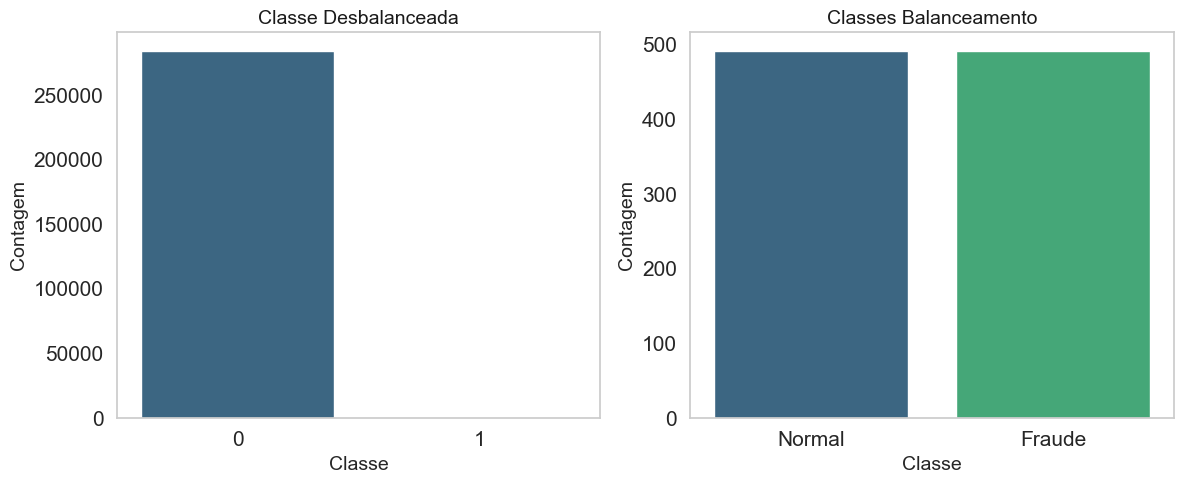

In [29]:
# Criando uma figura para os subplots
plt.figure(figsize=(12, 5))

# Subplot 1 - Gráfico de contagem de barras para a classe desbalanceada
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, subplot 1
sns.countplot(data=data, x="Class", palette='viridis')
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.title("Classe Desbalanceada", fontsize=14)
plt.grid(False)

# Subplot 2 - Gráfico de contagem de barras para a classe com balanceamento
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, subplot 2
data_2_tmp = data_novos.copy()
data_2_tmp['Class'] = data_2_tmp['Class'].apply(ana_fraud)
sns.countplot(data=data_2_tmp, x='Class', palette='viridis')
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.title("Classes Balanceamento", fontsize=14)
plt.grid(False)

# Ajuste de layout e exibição dos subplots
plt.tight_layout()
plt.show()

## 1.5) Correlação dados

Text(0.5, 1.0, 'Matriz de correlação dados balanceados')

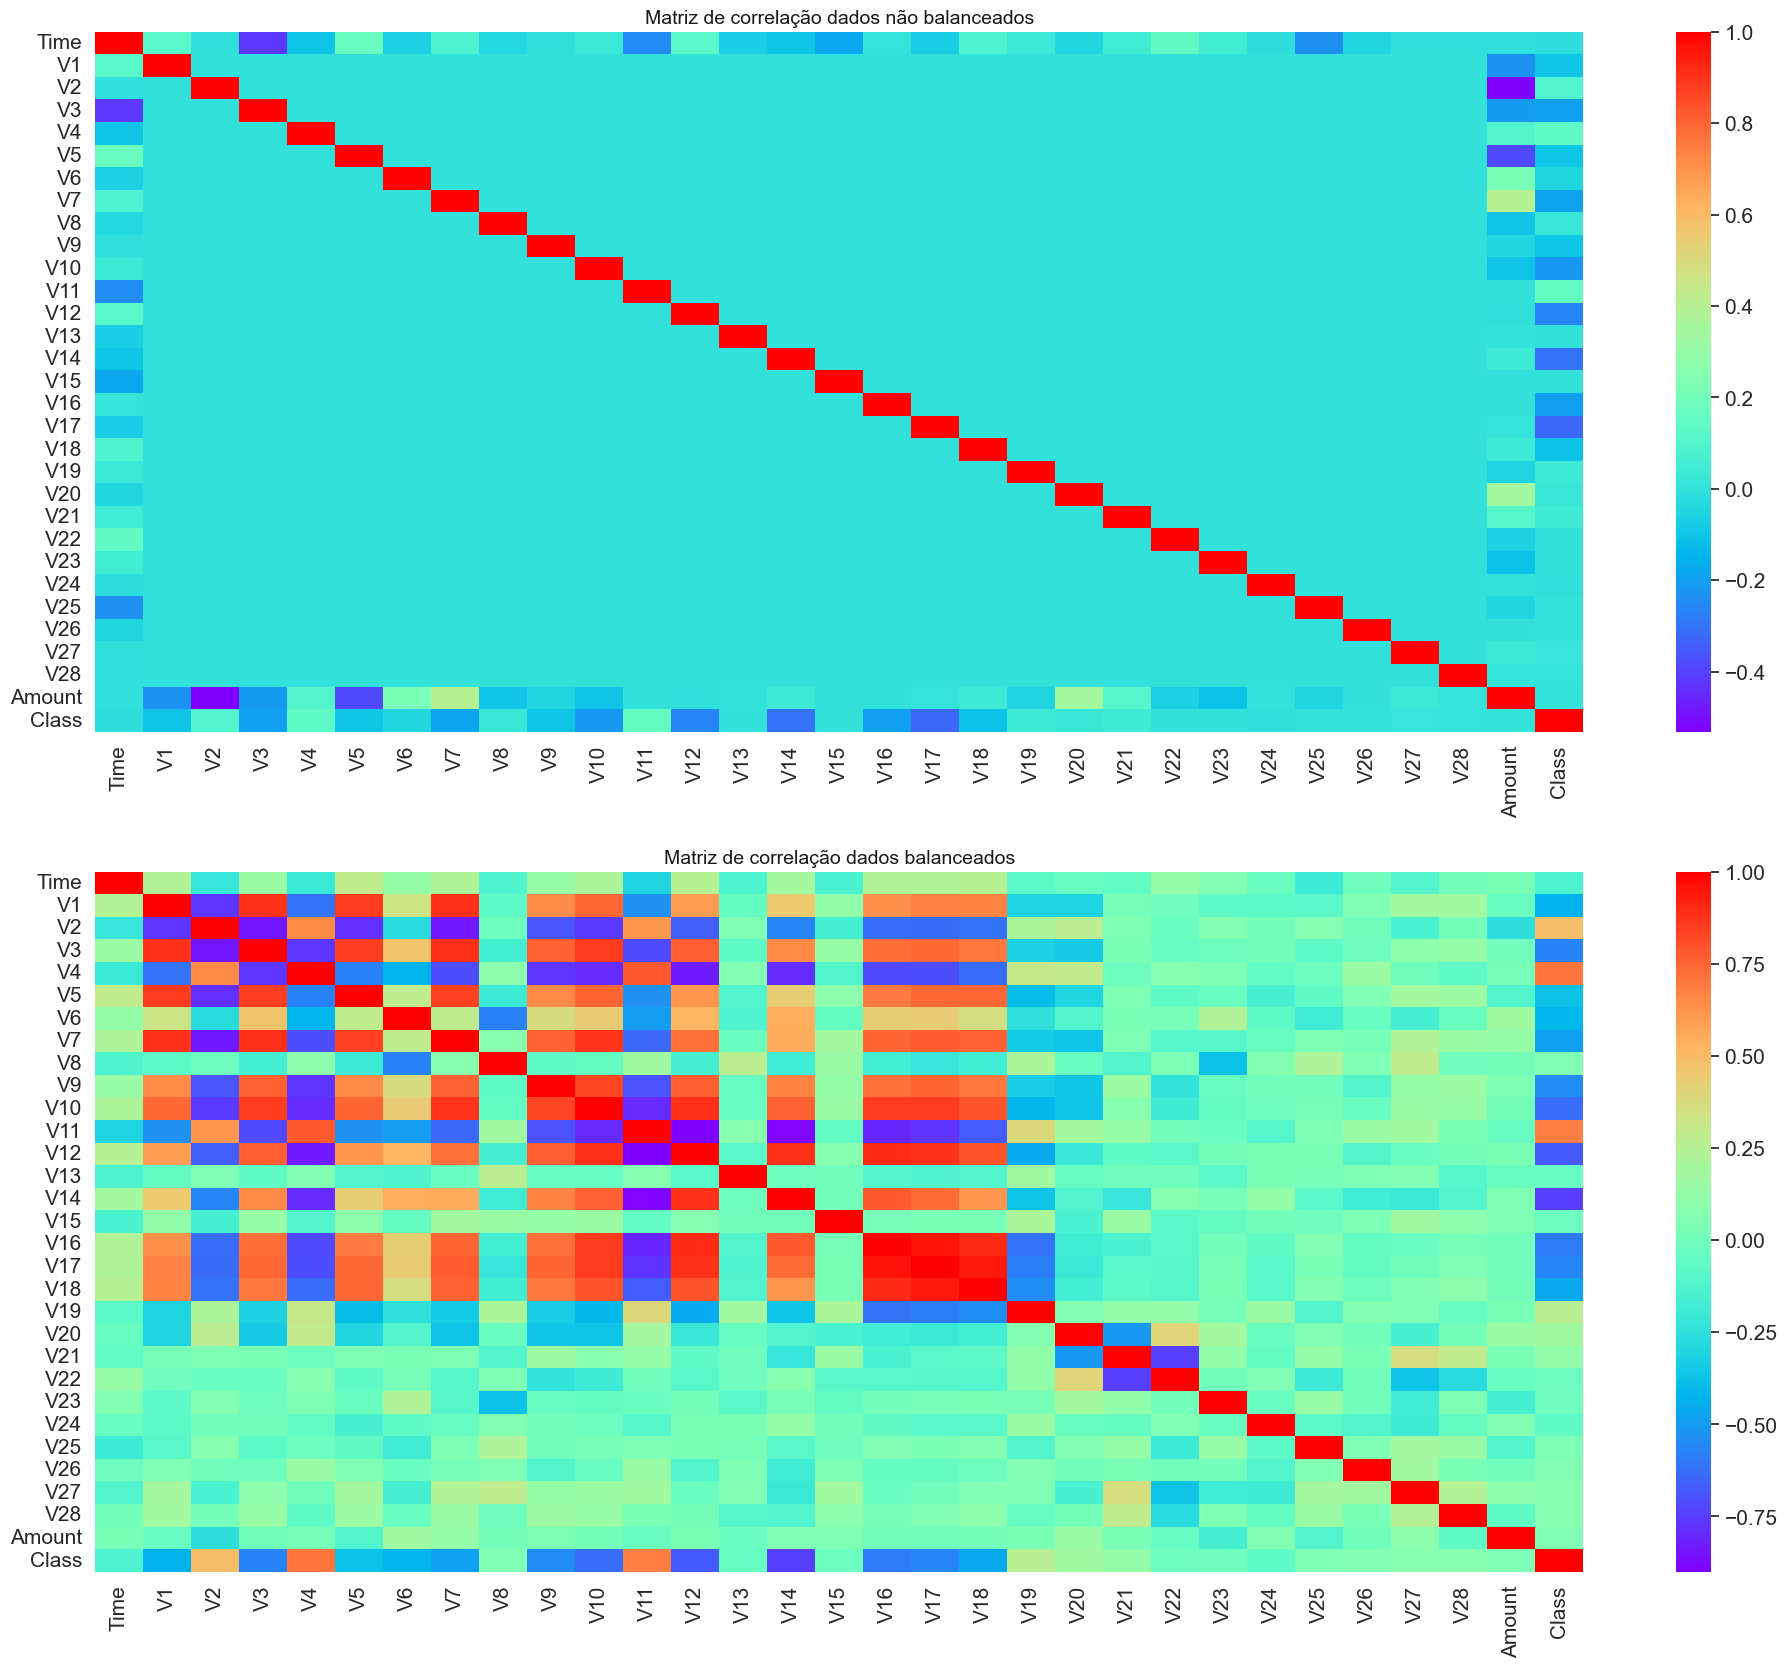

In [30]:
# Visualizando correlação
desbalanceada_correlacao = data.corr()
balanceada_correlacao = data_novos.corr()

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

sns.heatmap(desbalanceada_correlacao, cmap='rainbow', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Matriz de correlação dados não balanceados", fontsize=14)

sns.heatmap(balanceada_correlacao, cmap='rainbow', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Matriz de correlação dados balanceados', fontsize=14)

<AxesSubplot: xlabel='Class', ylabel='V11'>

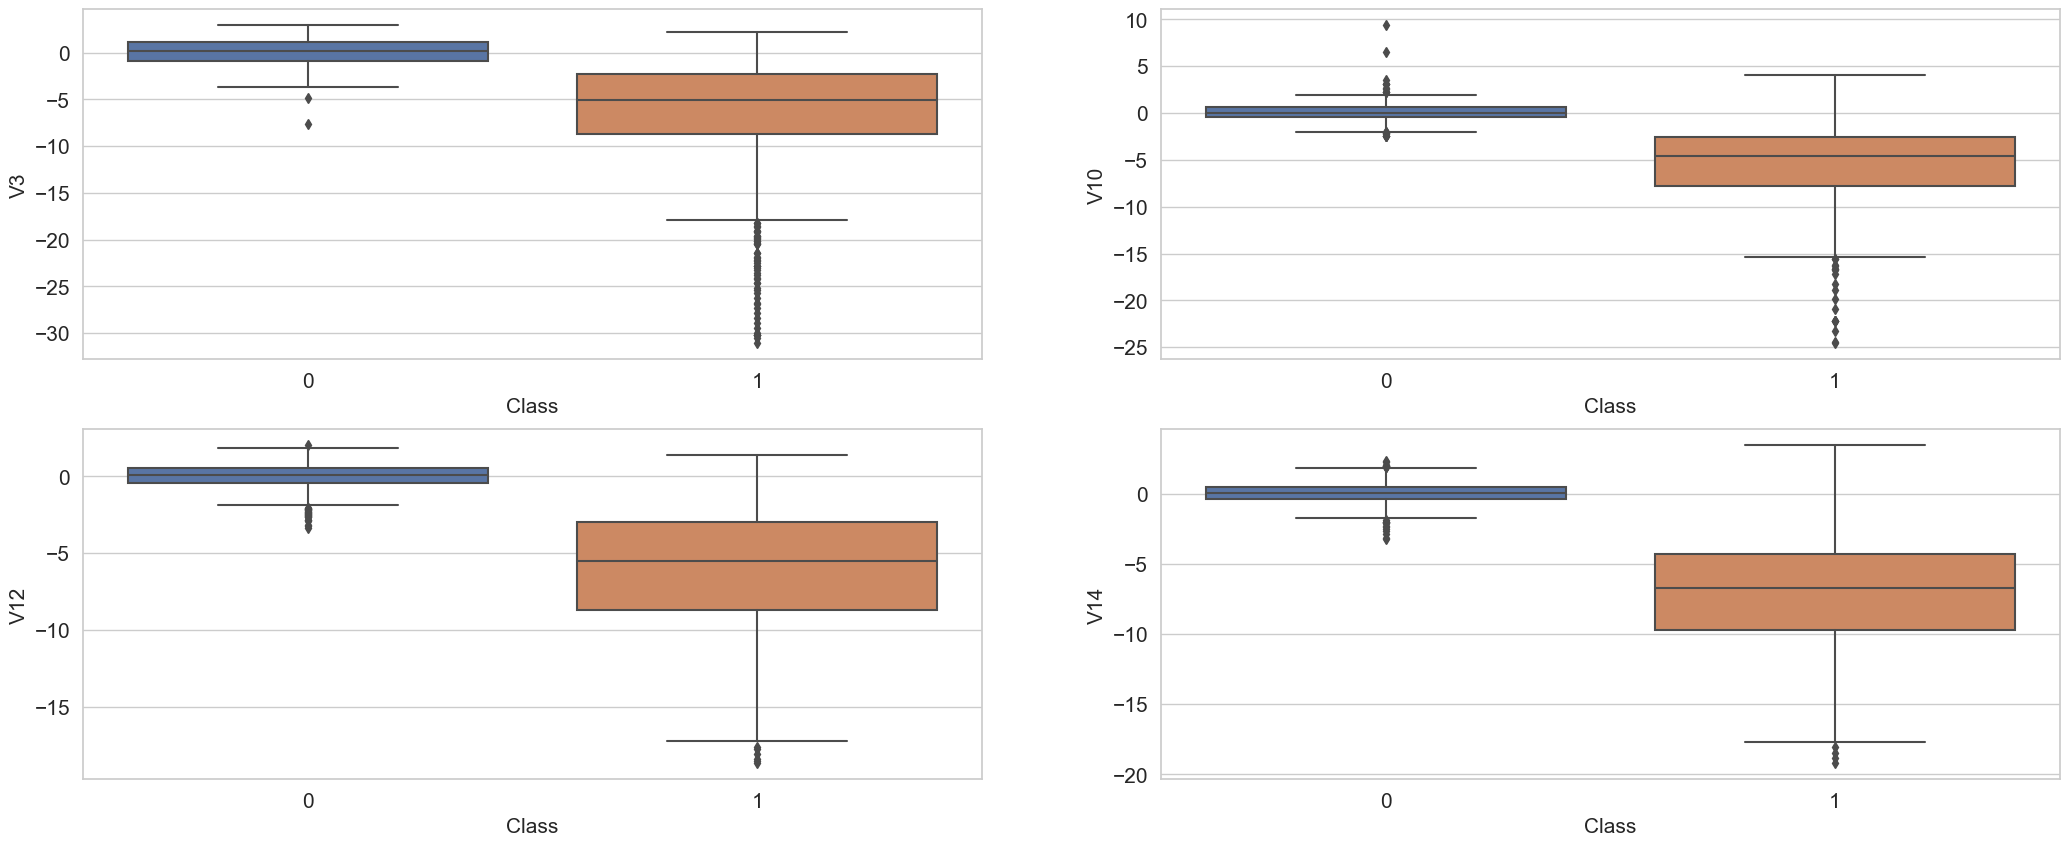

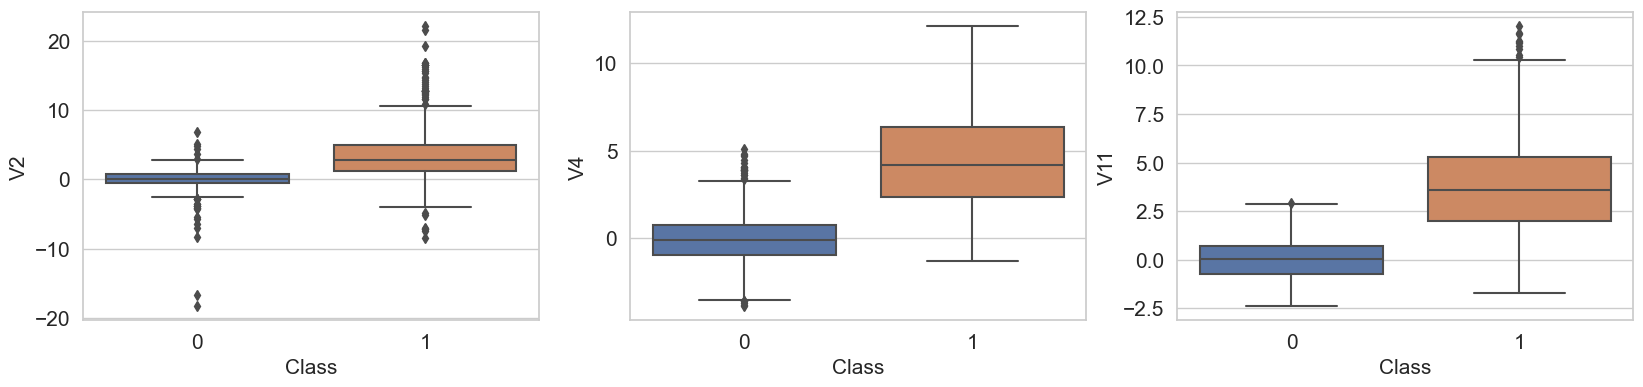

In [31]:
# boxplot irão nos ajudara
f, ax = plt.subplots(2,2, figsize=(25.5, 10))

sns.boxplot(x="Class", y="V3", data=data_novos,ax=ax[0][0])
sns.boxplot(x="Class", y="V10", data=data_novos,ax=ax[0][1])
sns.boxplot(x="Class", y="V12", data=data_novos,ax=ax[1][0])
sns.boxplot(x="Class", y="V14", data=data_novos,ax=ax[1][1])

f, ax = plt.subplots(1,3, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=data_novos,ax=ax[0])
sns.boxplot(x="Class", y="V4", data=data_novos,ax=ax[1])
sns.boxplot(x="Class", y="V11", data=data_novos,ax=ax[2])

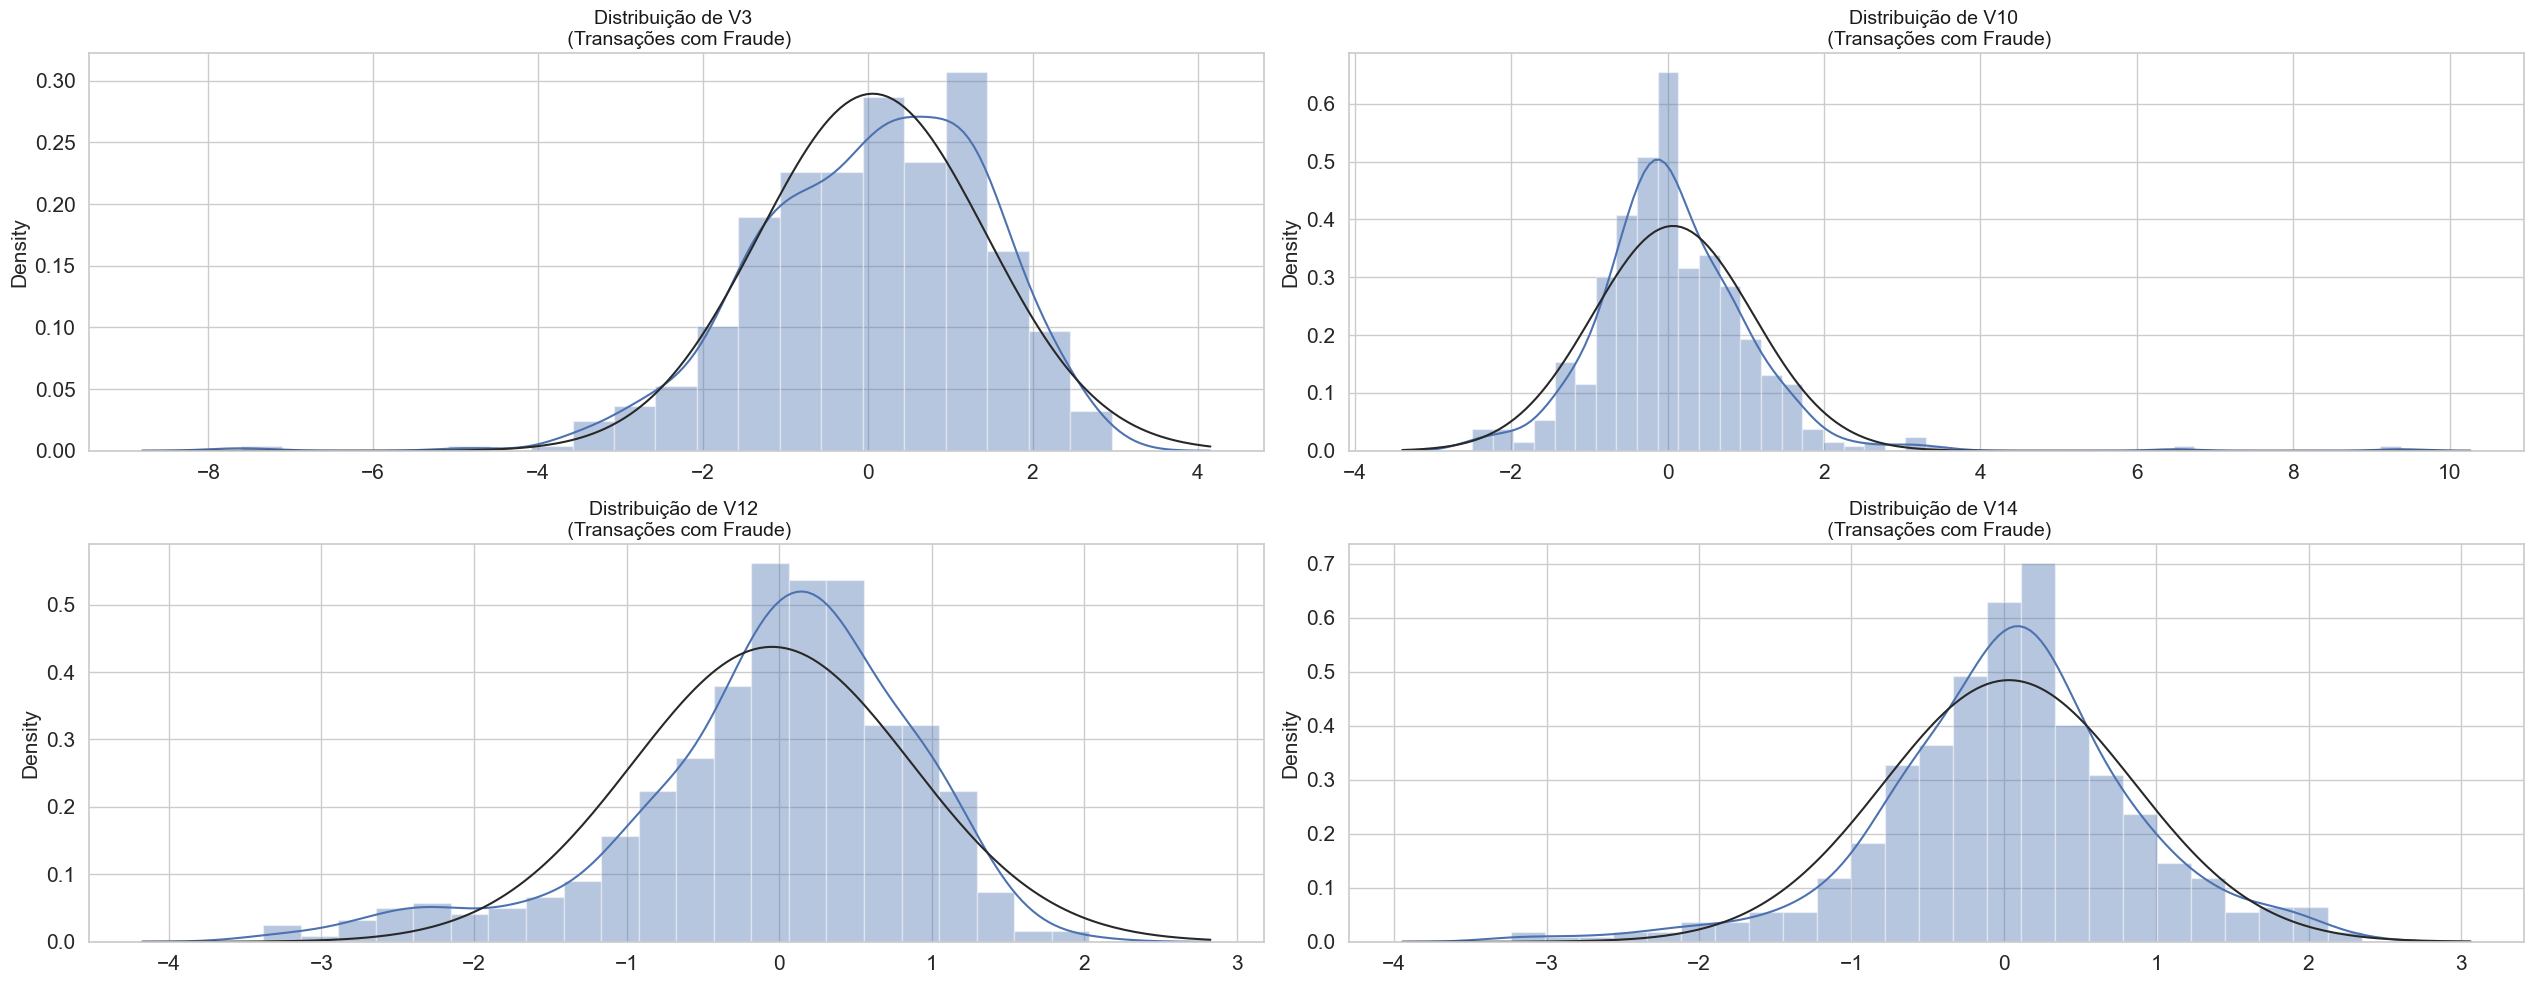

In [32]:
# Importando biblioteca
from scipy.stats import norm

f, ax = plt.subplots(2,2, figsize=(25.5, 10))

distribuicao_v3 = data_novos['V3'].loc[data_novos['Class'] == 0].values
sns.distplot(distribuicao_v3,ax=ax[0][0], fit=norm)
ax[0][0].set_title('Distribuição de V3 \n (Transações com Fraude)', fontsize=14)

distribuicao_v10 = data_novos['V10'].loc[data_novos['Class'] == 0].values
sns.distplot(distribuicao_v10,ax=ax[0][1], fit=norm)
ax[0][1].set_title('Distribuição de V10 \n (Transações com Fraude)', fontsize=14)

distribuicao_v12 = data_novos['V12'].loc[data_novos['Class'] == 0].values
sns.distplot(distribuicao_v12,ax=ax[1][0], fit=norm)
ax[1][0].set_title('Distribuição de V12 \n (Transações com Fraude)', fontsize=14)

distribuicao_v14 = data_novos['V14'].loc[data_novos['Class'] == 0].values
sns.distplot(distribuicao_v14,ax=ax[1][1], fit=norm)
ax[1][1].set_title('Distribuição de V14 \n (Transações com Fraude)', fontsize=14)

plt.tight_layout()

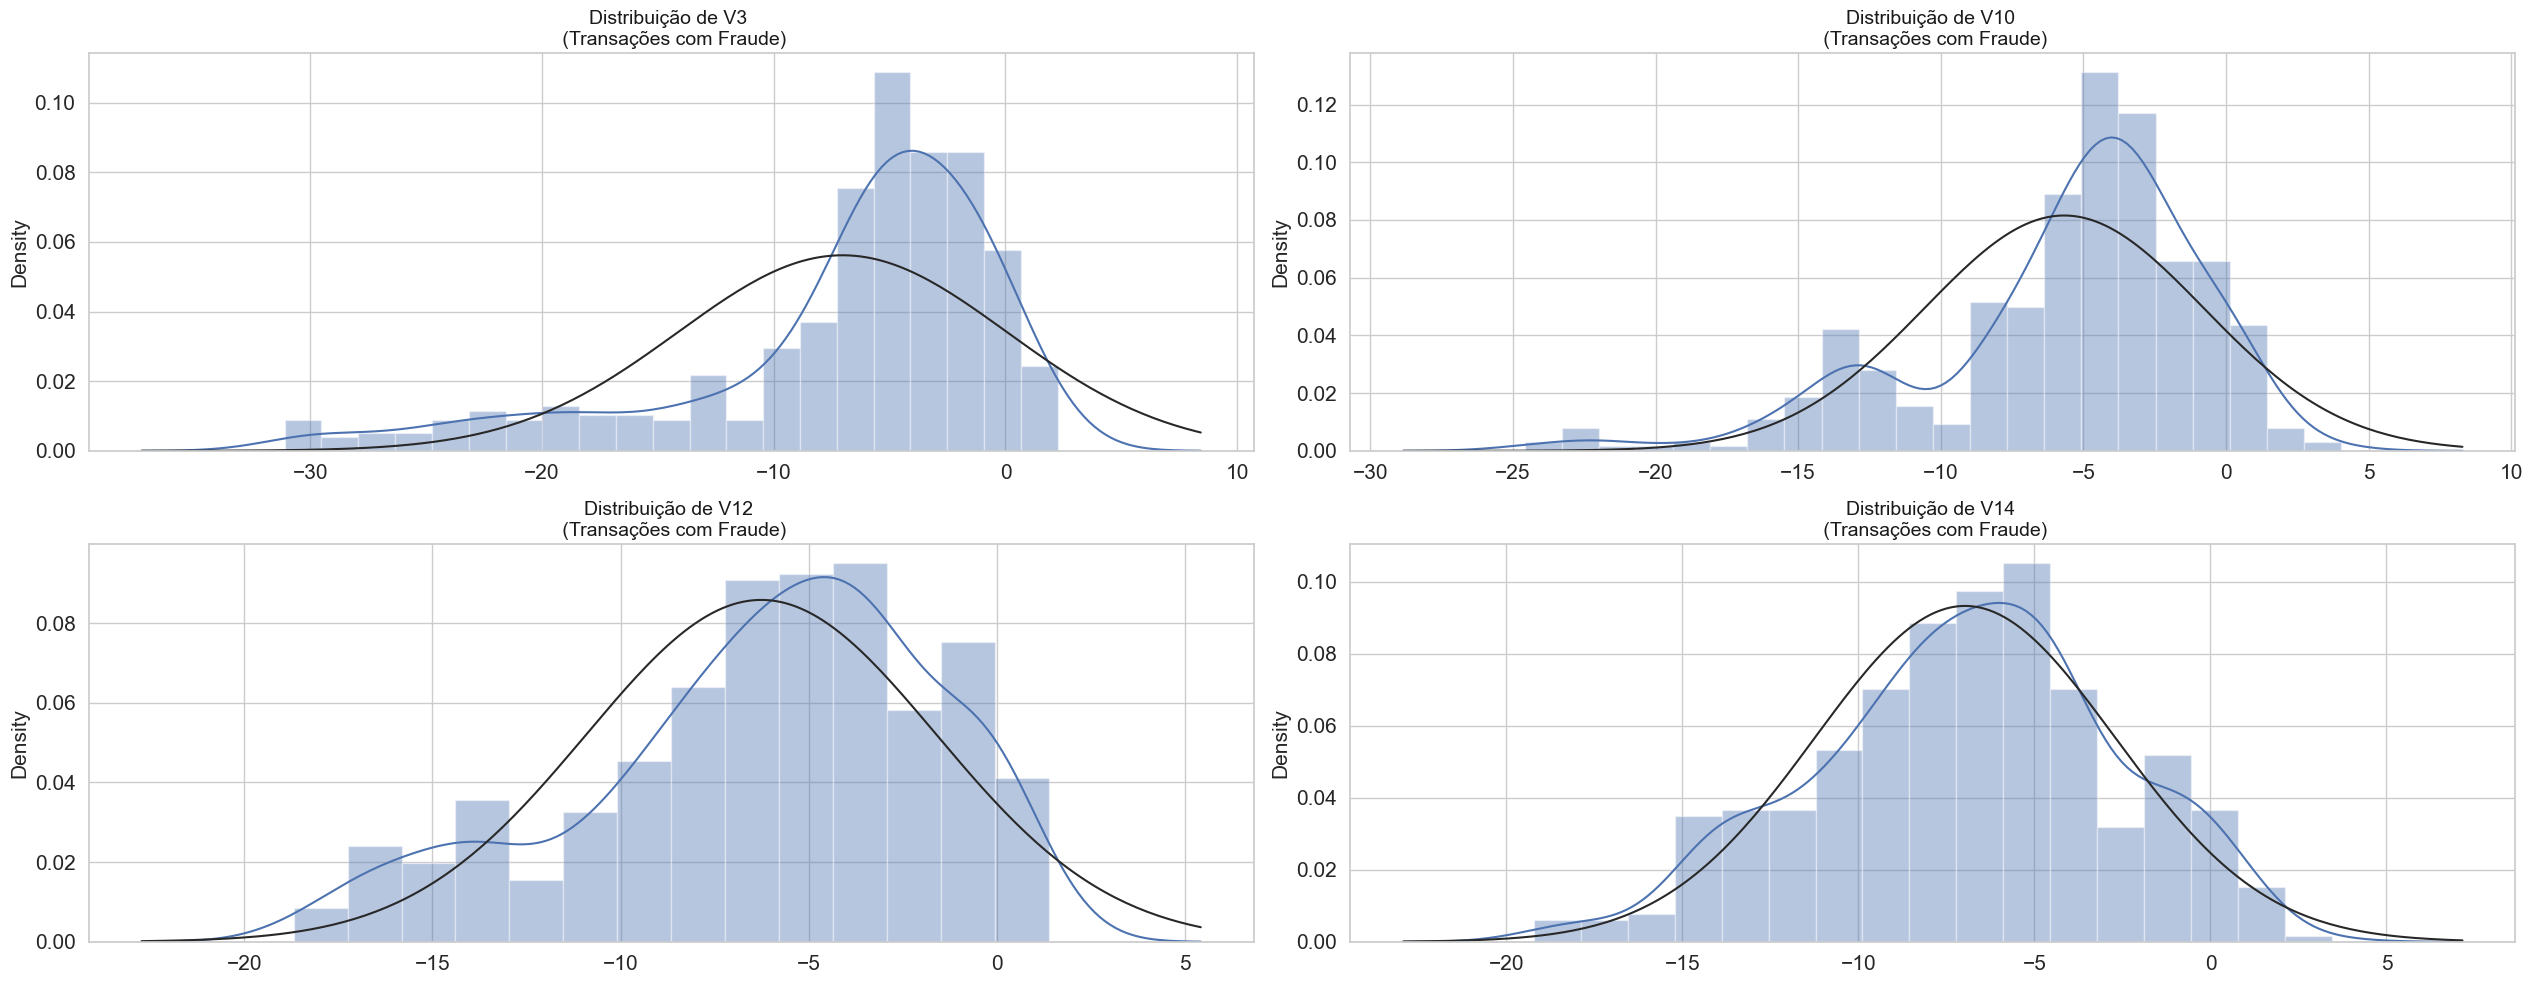

In [33]:
f, ax = plt.subplots(2,2, figsize=(25.5, 10))

v3_distribuicao = data_novos['V3'].loc[data_novos['Class'] == 1].values
sns.distplot(v3_distribuicao,ax=ax[0][0], fit=norm)
ax[0][0].set_title('Distribuição de V3 \n (Transações com Fraude)', fontsize=14)

v10_distribuicao = data_novos['V10'].loc[data_novos['Class'] == 1].values
sns.distplot(v10_distribuicao,ax=ax[0][1], fit=norm)
ax[0][1].set_title('Distribuição de V10 \n (Transações com Fraude)', fontsize=14)

v12_distribuicao = data_novos['V12'].loc[data_novos['Class'] == 1].values
sns.distplot(v12_distribuicao,ax=ax[1][0], fit=norm)
ax[1][0].set_title('Distribuição de V12 \n (Transações com Fraude)', fontsize=14)

v14_distribuicao = data_novos['V14'].loc[data_novos['Class'] == 1].values
sns.distplot(v14_distribuicao,ax=ax[1][1], fit=norm)
ax[1][1].set_title('Distribuição de V14 \n (Transações com Fraude)', fontsize=14)

plt.tight_layout()

## 1.6) Remoção de outliers

In [34]:
v3_fraude = data_novos['V3'].loc[data_novos['Class'] == 1].values
q25, q75 = np.percentile(v3_fraude, 25), np.percentile(v3_fraude, 75)

v3_iqr = q75 - q25

v3_cut_off = v3_iqr * 1.5
v3_inferior, v3_superior = q25 - v3_cut_off, q75 + v3_cut_off

outliers = [x for x in v3_fraude if x < v3_inferior or x > v3_superior]

data_novos = data_novos.drop(data_novos[(data_novos['V3'] > v3_superior) | (data_novos['V3'] < v3_inferior)].index)

v10_fraude = data_novos['V10'].loc[data_novos['Class'] == 1].values
q25, q75 = np.percentile(v10_fraude, 25), np.percentile(v10_fraude, 75)

v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_inferior, v10_superior = q25 - v10_cut_off, q75 + v10_cut_off

outliers = [x for x in v10_fraude if x < v10_inferior or x > v10_superior]

dados_novos = data_novos.drop(data_novos[(data_novos['V10'] > v10_superior) | (data_novos['V10'] < v10_inferior)].index)

v12_fraude = data_novos['V12'].loc[data_novos['Class'] == 1].values
q25, q75 = np.percentile(v12_fraude, 25), np.percentile(v12_fraude, 75)

v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_inferior, v12_superior = q25 - v12_cut_off, q75 + v12_cut_off

outliers = [x for x in v12_fraude if x < v12_inferior or x > v12_superior]

data_novos = data_novos.drop(data_novos[(data_novos['V12'] > v12_superior) | (data_novos['V12'] < v12_inferior)].index)

v14_fraude = data_novos['V14'].loc[data_novos['Class'] == 1].values
q25, q75 = np.percentile(v14_fraude, 25), np.percentile(v14_fraude, 75)

v14_iqr = q75 - q25

v14_cut_off = v14_iqr * 1.5
v14_inferior, v14_superior = q25 - v14_cut_off, q75 + v14_cut_off

outliers = [x for x in v14_fraude if x < v14_inferior or x > v14_superior]

data_novos = data_novos.drop(data_novos[(data_novos['V14'] > v14_superior) | (data_novos['V14'] < v14_inferior)].index)
data_novos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258964,0.871780,1.813931,-0.339205,-2.056361,0.352029,0.414492,-0.497692,0.223451,-0.182322,1.000845,-0.914551,-0.832532,0.244356,0.167175,-1.492657,-0.012138,0.088189,0.938056,0.110541,0.197178,0.119198,-0.198910,-0.609751,0.059605,0.162736,-0.037981,-0.104971,-0.031358,0.002729,1.573395,0
154454,0.198604,0.913116,1.145381,-4.602878,2.091803,-0.473224,-2.085436,-1.671244,0.094397,0.337799,-4.431810,4.871980,-5.395221,1.332502,-4.603797,-0.777314,-2.571892,-3.003615,-0.225441,0.252274,0.508985,0.401416,-0.084933,-0.197684,-0.283271,0.387597,-0.553527,0.516274,0.270828,1.758821,1
121909,-0.097851,-0.705167,0.098955,2.037943,-0.326555,-1.654233,0.535217,-0.881121,0.684964,-1.454179,0.286505,0.697291,-0.241939,0.250828,-0.188950,0.448288,0.866760,0.773802,0.031927,2.709454,0.437846,0.481426,1.197829,-0.185738,0.068687,0.222456,0.241857,-0.017222,0.017725,0.796479,0
8845,-0.852888,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,-4.138891,5.149409,-11.124019,0.543068,-7.840942,0.743634,-6.777069,-9.931765,-4.093021,1.504925,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,0.117236,1
101509,-0.197782,-1.739334,-1.304655,0.314103,0.053740,-0.058696,0.071260,0.694862,-0.313270,-0.649377,0.517568,-1.356558,-0.238383,0.069579,-0.431690,-0.674724,-1.654162,-0.053961,0.520746,-1.554562,-1.463994,-0.665172,-0.632078,-0.421176,-0.400774,-0.001640,-0.495162,0.031633,0.066280,4.164047,1


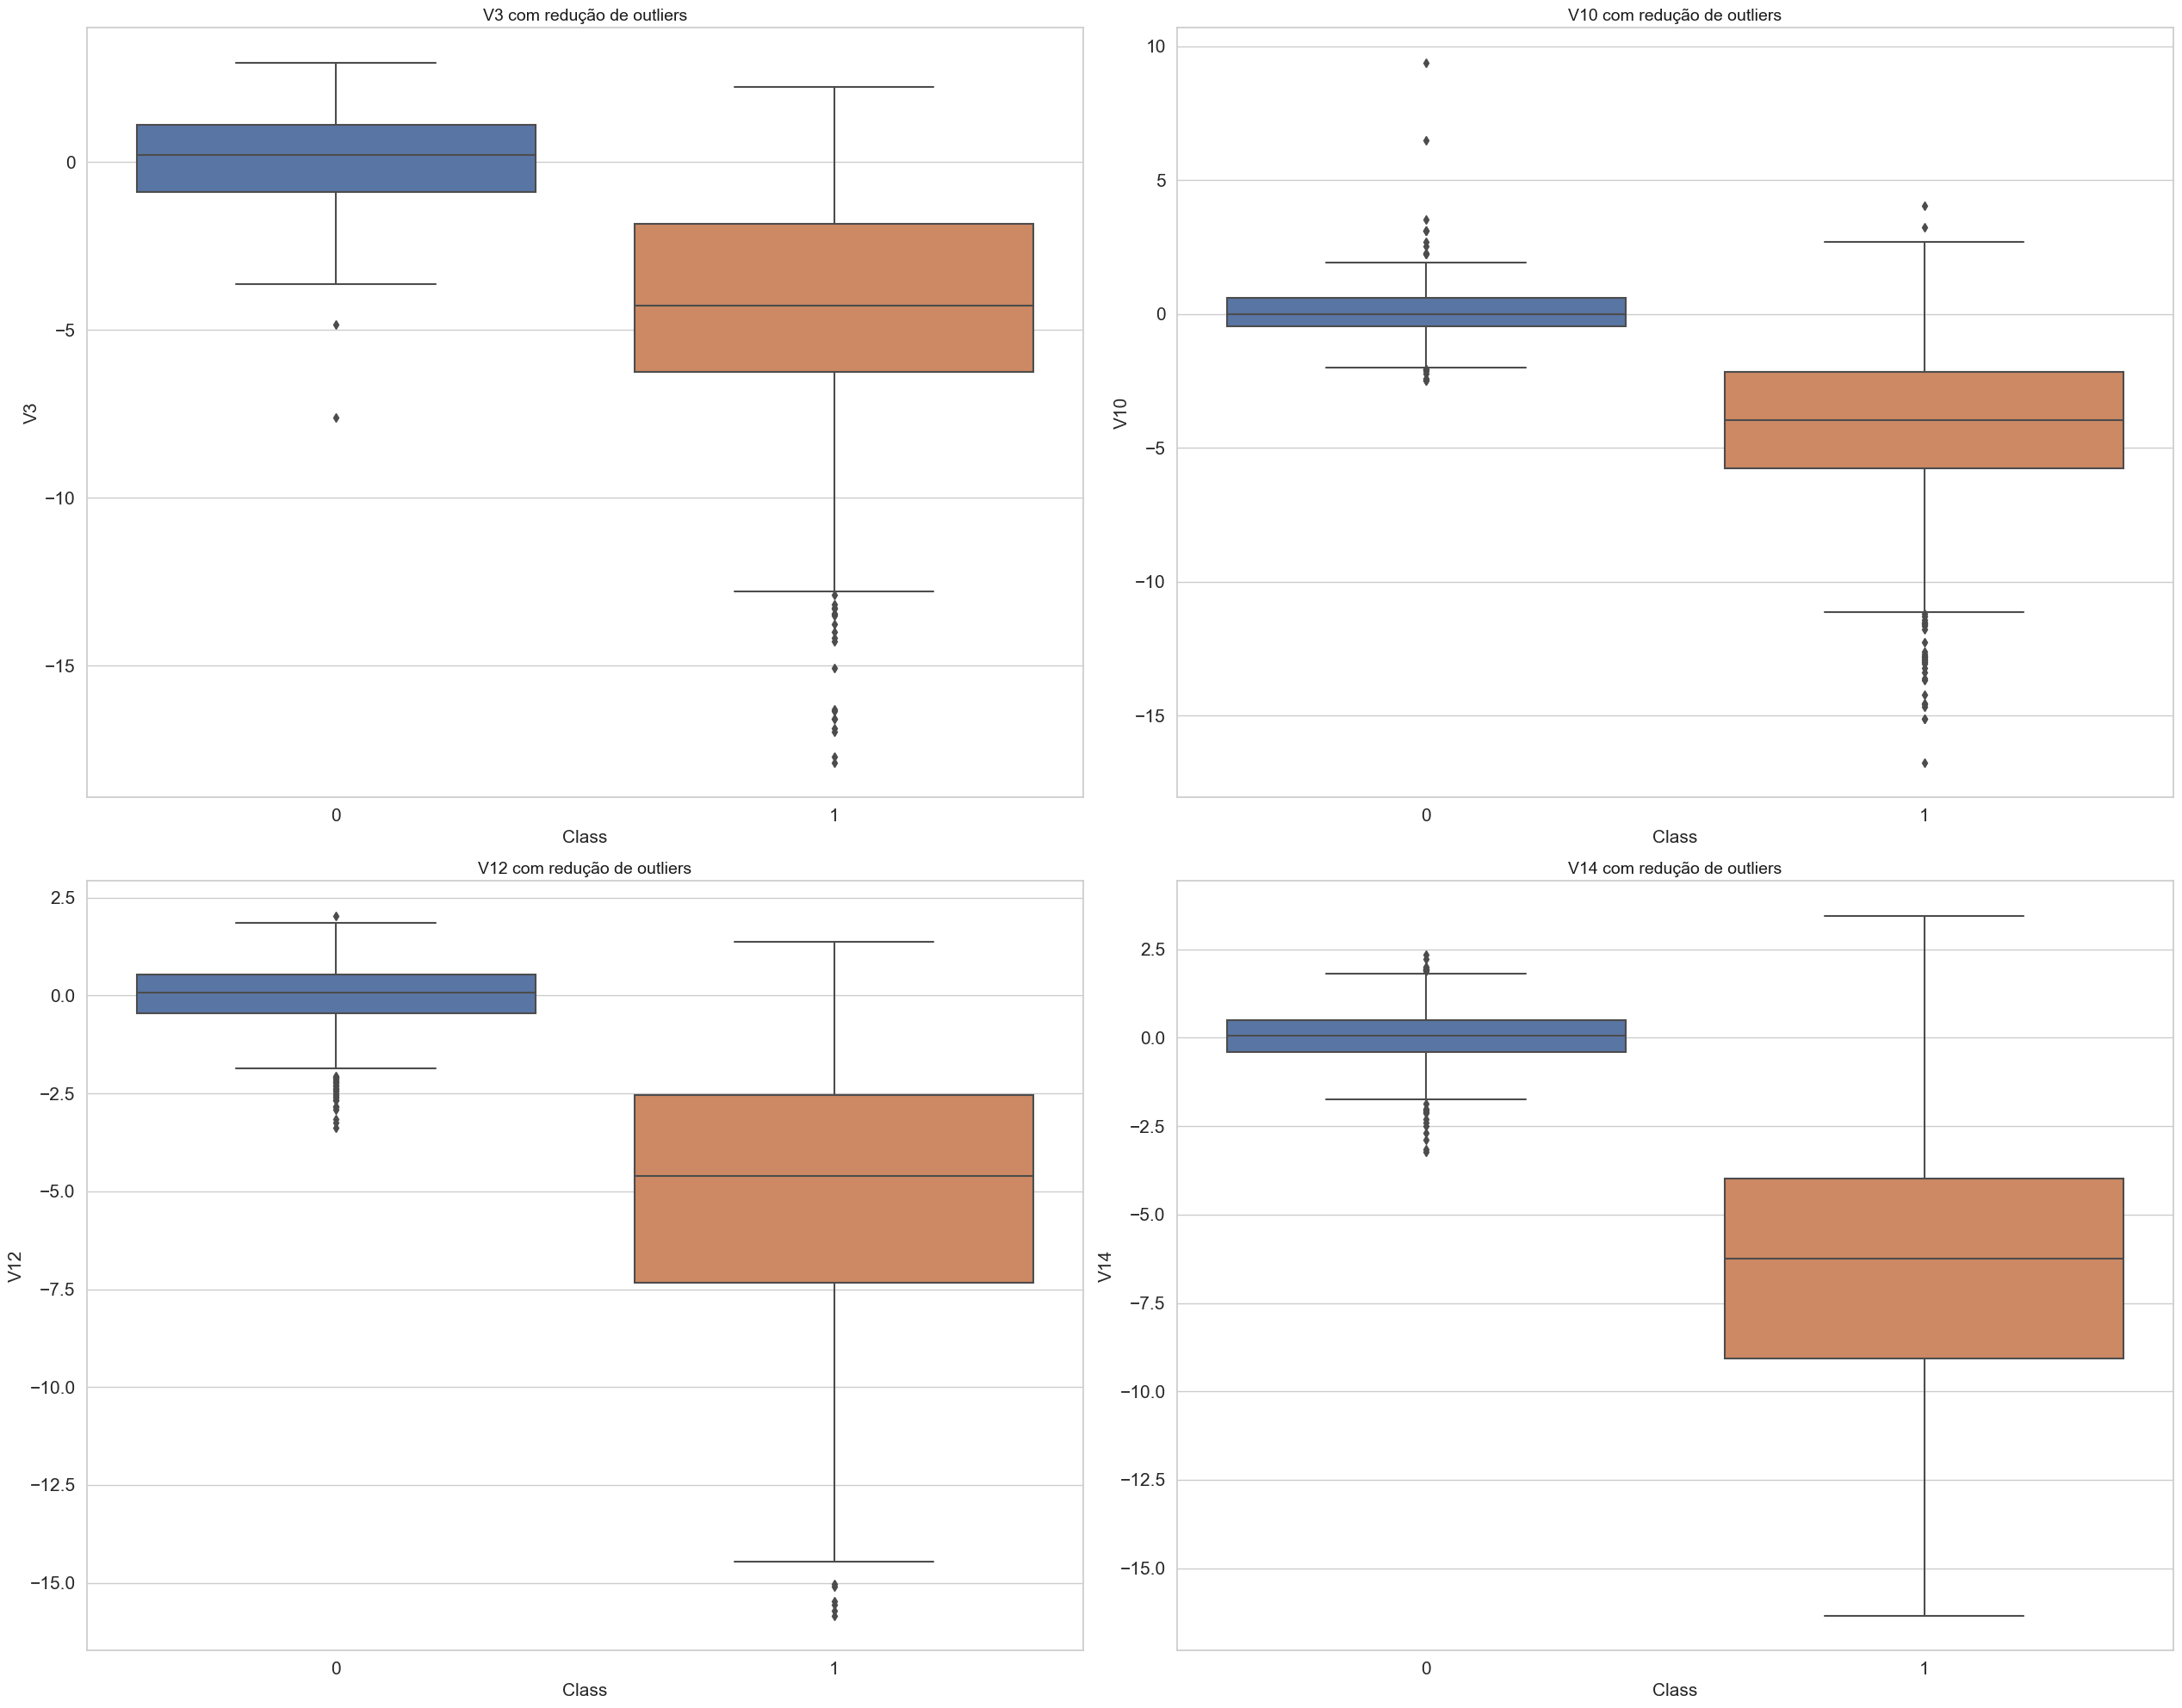

In [35]:
f, ax = plt.subplots(2,2, figsize=(25.5, 20))

sns.boxplot(x="Class", y="V3", data=data_novos,ax=ax[0][0])
ax[0][0].set_title("V3 com redução de outliers", fontsize=14)

sns.boxplot(x="Class", y="V10", data=data_novos,ax=ax[0][1])
ax[0][1].set_title("V10 com redução de outliers", fontsize=14)

sns.boxplot(x="Class", y="V12", data=data_novos,ax=ax[1][0])
ax[1][0].set_title("V12 com redução de outliers", fontsize=14)

sns.boxplot(x="Class", y="V14", data=data_novos,ax=ax[1][1])
ax[1][1].set_title("V14 com redução de outliers", fontsize=14)

plt.tight_layout()

## 1.7) Técnica de dimensionalidade dados 

CPU times: total: 17.8 s
Wall time: 1.95 s


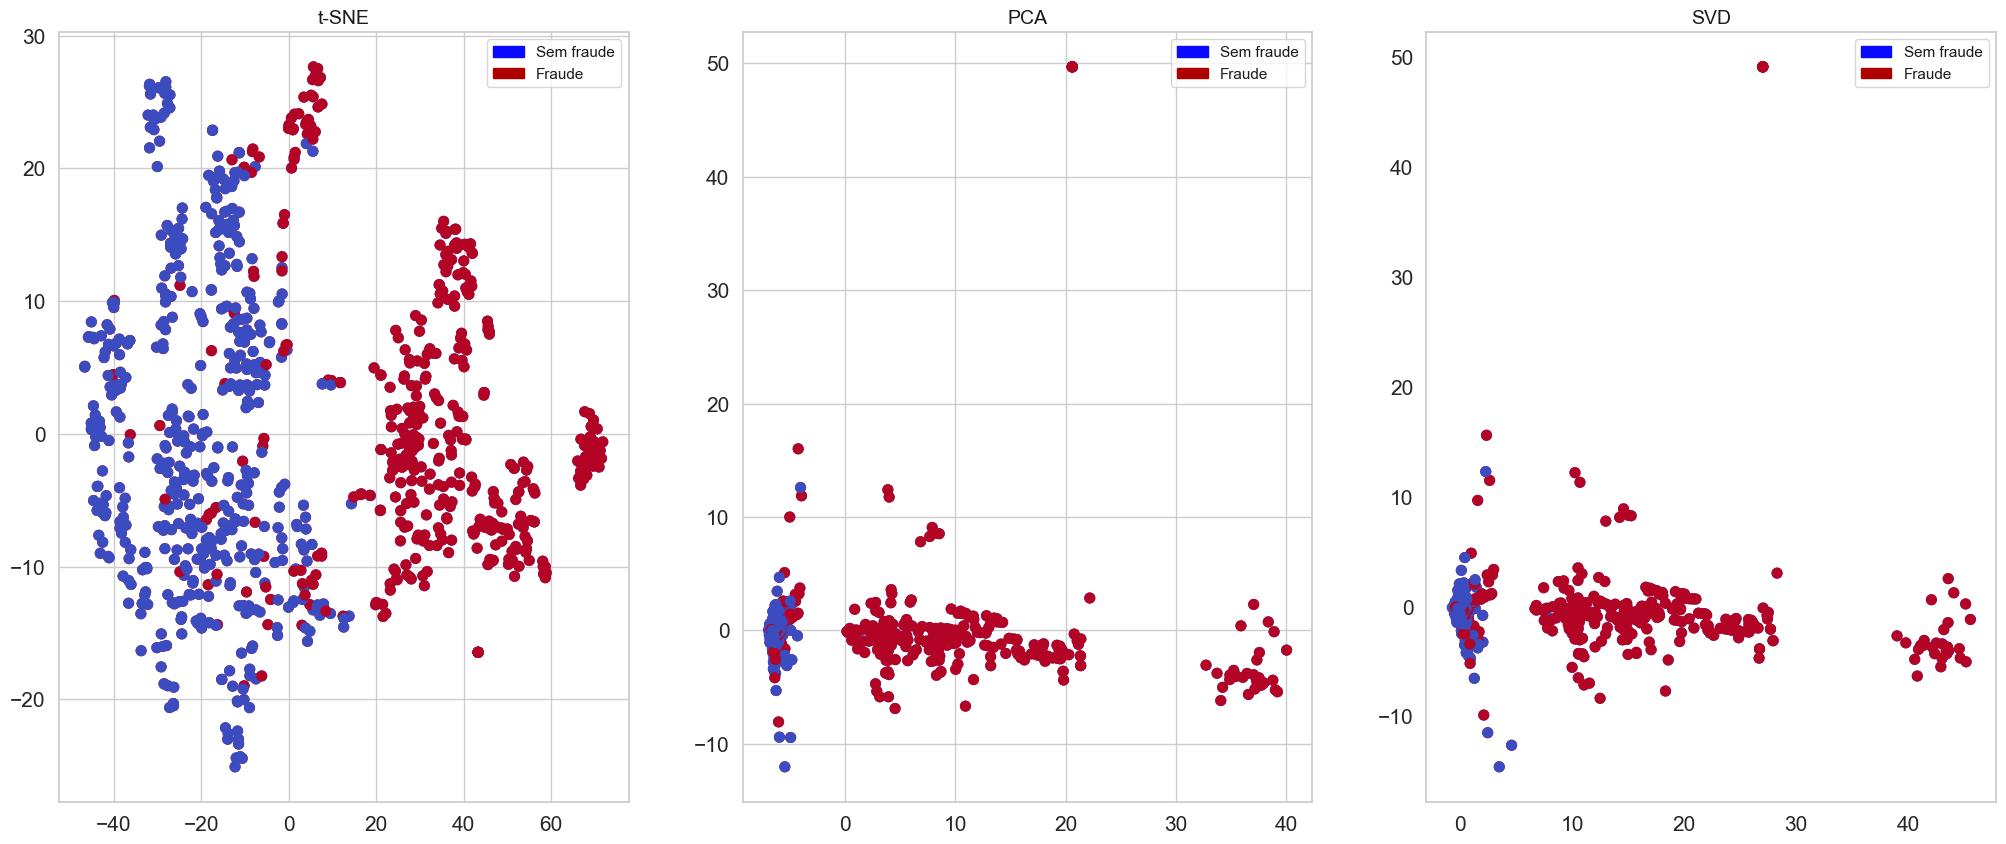

In [36]:
%%time

# Divisão dados 
x = data_novos.drop("Class", axis=1).values
y = data_novos["Class"].values

# Importando biblioteca
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.patches as mpatches

# Modelo t_SNE
model_reduzido_tsne = TSNE(n_components=2, random_state=42).fit_transform(x)

# Modelo PCA
model_reduzido_pca = PCA(n_components=2, random_state=42).fit_transform(x)

# Modelo SVD
model_reduzido_svd = TruncatedSVD(n_components=2,
                                  algorithm='randomized',
                                  random_state=42).fit_transform(x)

# Gráfico de risco de fraude credito

azul = mpatches.Patch(color='#0A0AFF', label='Sem fraude')
vermelho = mpatches.Patch(color='#AF0000', label='Fraude')

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))

ax1.scatter(model_reduzido_tsne[:,0], model_reduzido_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Sem fraude', linewidths=2)
ax1.scatter(model_reduzido_tsne[:,0], model_reduzido_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax3.grid(False)
ax1.legend(handles=[azul, vermelho])

ax2.scatter(model_reduzido_pca[:,0], model_reduzido_pca[:,1], c=(y == 0), cmap='coolwarm', label='Sem fraude', linewidths=2)
ax2.scatter(model_reduzido_pca[:,0], model_reduzido_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax3.grid(False)
ax2.legend(handles=[azul, vermelho])

ax3.scatter(model_reduzido_svd[:,0], model_reduzido_svd[:,1], c=(y == 0), cmap='coolwarm', label='Sem fraude', linewidths=2)
ax3.scatter(model_reduzido_svd[:,0], model_reduzido_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax3.set_title('SVD', fontsize=14)
ax3.grid(False)
ax3.legend(handles=[azul, vermelho])

# Segunda técnica de classes desembalecandas

## 1.8) Pré-processamento padronizar dados

- O StandardScaler calcula a média e o desvio padrão de cada característica e, em seguida, subtrai a média de cada valor e divide pelo desvio padrão. Isso garante que os dados resultantes estejam na mesma escala, centrados em torno de 0 e com variância unitária, facilitando a interpretação e o desempenho dos modelos de machine learning.

In [37]:
# Importando biblioteca
from sklearn.preprocessing import StandardScaler

# Criando um objeto
pre_standard_scaler = StandardScaler()

# Treinamento
data['Amount_norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# Criando coluna nova dataframe
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_norm
183844,2.047257,-0.369756,-2.544861,-0.727895,2.386680,3.318663,-0.476749,0.791092,0.403162,0.092394,0.004416,0.390240,-0.212234,0.495951,0.472859,-0.171358,-0.368207,-0.976203,0.022295,-0.151312,-0.292272,-0.835752,0.380154,0.698272,-0.265459,0.219083,-0.052471,-0.066627,0,-0.342475
190773,1.408002,-1.418459,-0.813727,0.465882,-0.836096,-0.176161,-0.193400,-0.036145,1.138220,-0.141927,-1.011129,0.026138,-0.354080,0.058333,0.689325,0.572897,-0.536751,-0.214929,-0.114142,0.449769,-0.045494,-0.798709,0.172287,0.656315,-0.738826,0.212977,-0.103126,0.016931,0,0.941151
268766,-1.298070,0.134807,1.312720,-2.343031,-0.959981,0.480555,1.299883,-0.044092,0.411977,-1.293022,0.762279,0.152334,-0.747556,0.011615,0.080394,0.754018,-1.005854,0.760341,-0.175569,-0.337071,0.148539,0.532262,-0.463110,0.842377,0.473548,0.677394,-0.085775,-0.079241,0,0.725174
280661,1.681185,-1.430741,-1.589918,-0.275127,-0.615932,-0.403697,-0.159213,-0.159460,-0.486152,0.863290,0.552011,0.315419,-0.420292,0.583915,-0.192309,-1.523260,-0.388933,2.000162,-0.755318,-0.178205,0.130958,0.422536,-0.141516,0.766047,0.093324,-0.097272,-0.044252,-0.017228,0,0.602313
61195,1.140050,-0.388897,1.123838,0.269019,-1.130936,-0.344953,-0.523259,-0.021983,1.023817,-0.503820,-0.593296,1.200210,1.151882,-0.779968,-0.426624,-0.170416,0.079054,-0.775430,0.445635,0.073512,-0.197760,-0.336451,0.033556,0.506345,0.162206,0.934213,-0.033139,0.023449,0,-0.169677


In [38]:
# Divisão dados para smote
x = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])

print('Visualizando dados x: {}'.format(x.shape))
print('Visualizando dados y: {}'.format(y.shape))

Visualizando dados x: (284807, 29)
Visualizando dados y: (284807, 1)


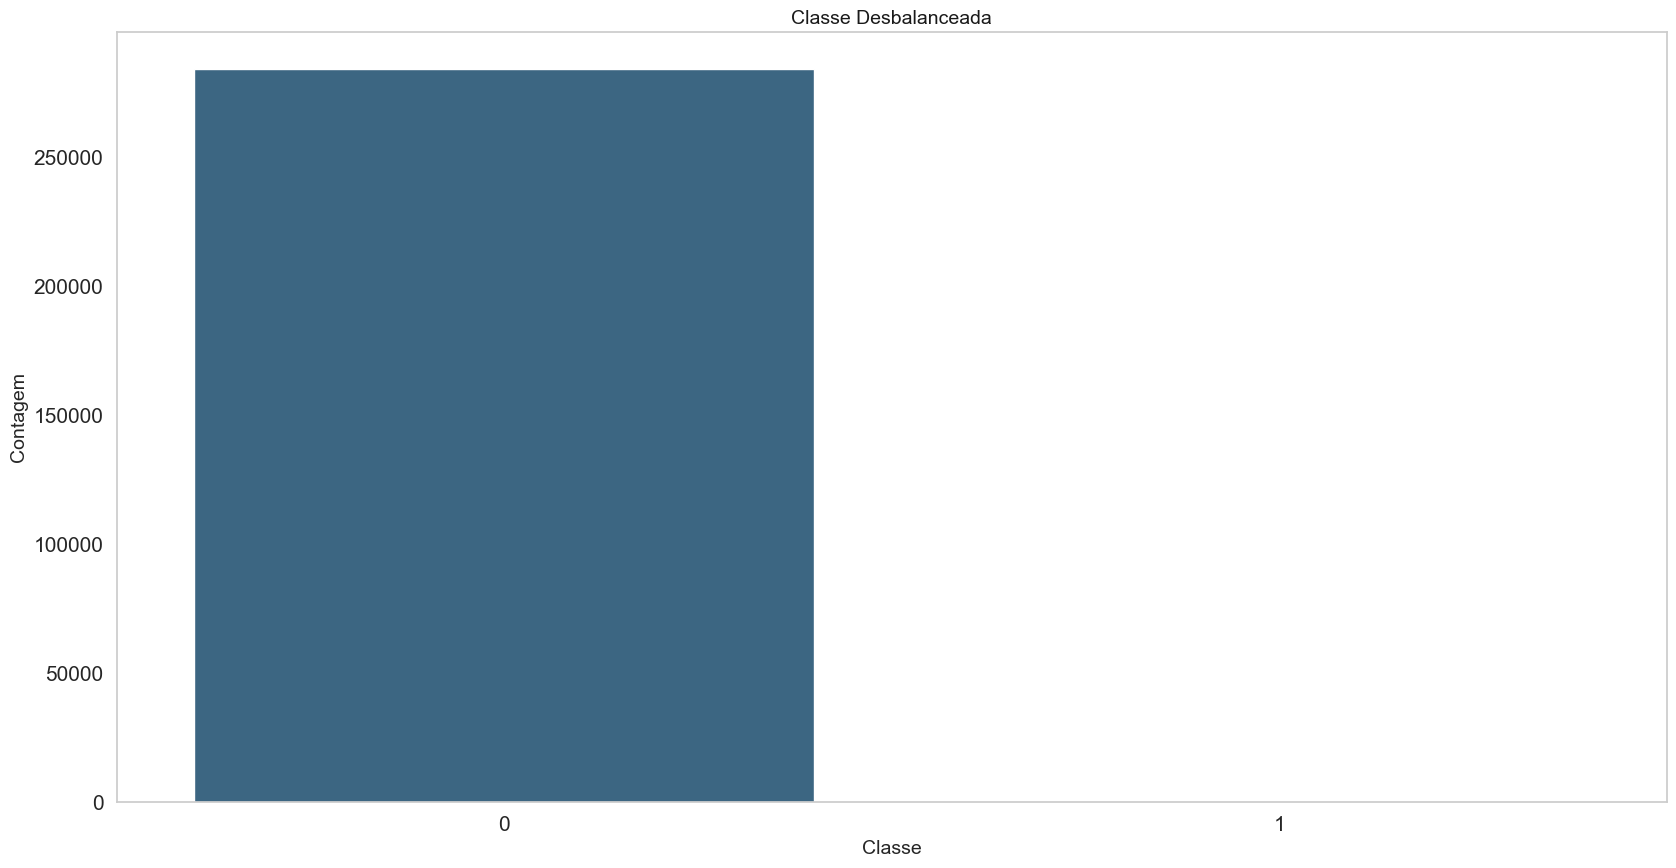

In [39]:
# Visuaizando dados sem classes palette='viridis'
sns.countplot(x='Class', data=data, palette='viridis')
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.title("Classe Desbalanceada", fontsize=14)
plt.grid(False)

## 1.9) SMOTE significa Synthetic Minority Over-sampling Technique - Técnica de reamostragem dados desbalanceados.

Uma abordagem comum para lidar com conjuntos de dados desbalanceados é o uso do SMOTE (Synthetic Minority Over-sampling Technique). Esta técnica é amplamente empregada na resolução de problemas relacionados à disparidade entre classes. O SMOTE atua gerando artificialmente exemplos da classe minoritária, aumentando sua representação no conjunto de dados. Ao sintetizar novas instâncias a partir das existentes, o SMOTE equilibra a distribuição das classes, permitindo que modelos de machine learning capturem melhor os padrões subjacentes dos dados, especialmente em situações em que a classe minoritária é crucial para a análise e tomada de decisões assertivas.

In [40]:
# Importando biblioteca
from sklearn.model_selection import train_test_split

# Treianmento da classes desbalanceada
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)

print("Transações numéricas X_train dataset: ", X_train.shape)
print("Transações numéricas y_train dataset: ", y_train.shape)
print("Transações numéricas X_test dataset: ", X_test.shape)
print("Transações numéricas y_test dataset: ", y_test.shape)

Transações numéricas X_train dataset:  (199364, 29)
Transações numéricas y_train dataset:  (199364, 1)
Transações numéricas X_test dataset:  (85443, 29)
Transações numéricas y_test dataset:  (85443, 1)


In [41]:
# Importando biblioteca
from imblearn.over_sampling import SMOTE

# Visualizando dados desbalanceada
print("Antes do Sobreamostragem, contagens do rótulo '1': {}".format(sum(y_train == 1)))
print("Antes do Sobreamostragem, contagens do rótulo '0': {} \n".format(sum(y_train == 0)))
print('-' * 100)

# Aplicando técnica SMOTE
pre_smote = SMOTE(random_state=2)
x_train_resp, y_train_resp = pre_smote.fit_resample(X_train, y_train.ravel())

print("Visualizando dados balanceados")
print('Após a Sobreamostragem, linhas colunas treinamento x: {}'.format(x_train_resp.shape))
print('Após a Sobreamostragem, linhas colunas treinamento y: {} \n'.format(y_train_resp.shape))
print("Após a Sobreamostragem, colunas '1': {}".format(sum(y_train_resp == 1)))
print("Após a Sobreamostragem, colunas '0': {}".format(sum(y_train_resp == 0)))

Antes do Sobreamostragem, contagens do rótulo '1': [334]
Antes do Sobreamostragem, contagens do rótulo '0': [199030] 

----------------------------------------------------------------------------------------------------
Visualizando dados balanceados
Após a Sobreamostragem, linhas colunas treinamento x: (398060, 29)
Após a Sobreamostragem, linhas colunas treinamento y: (398060,) 

Após a Sobreamostragem, colunas '1': 199030
Após a Sobreamostragem, colunas '0': 199030


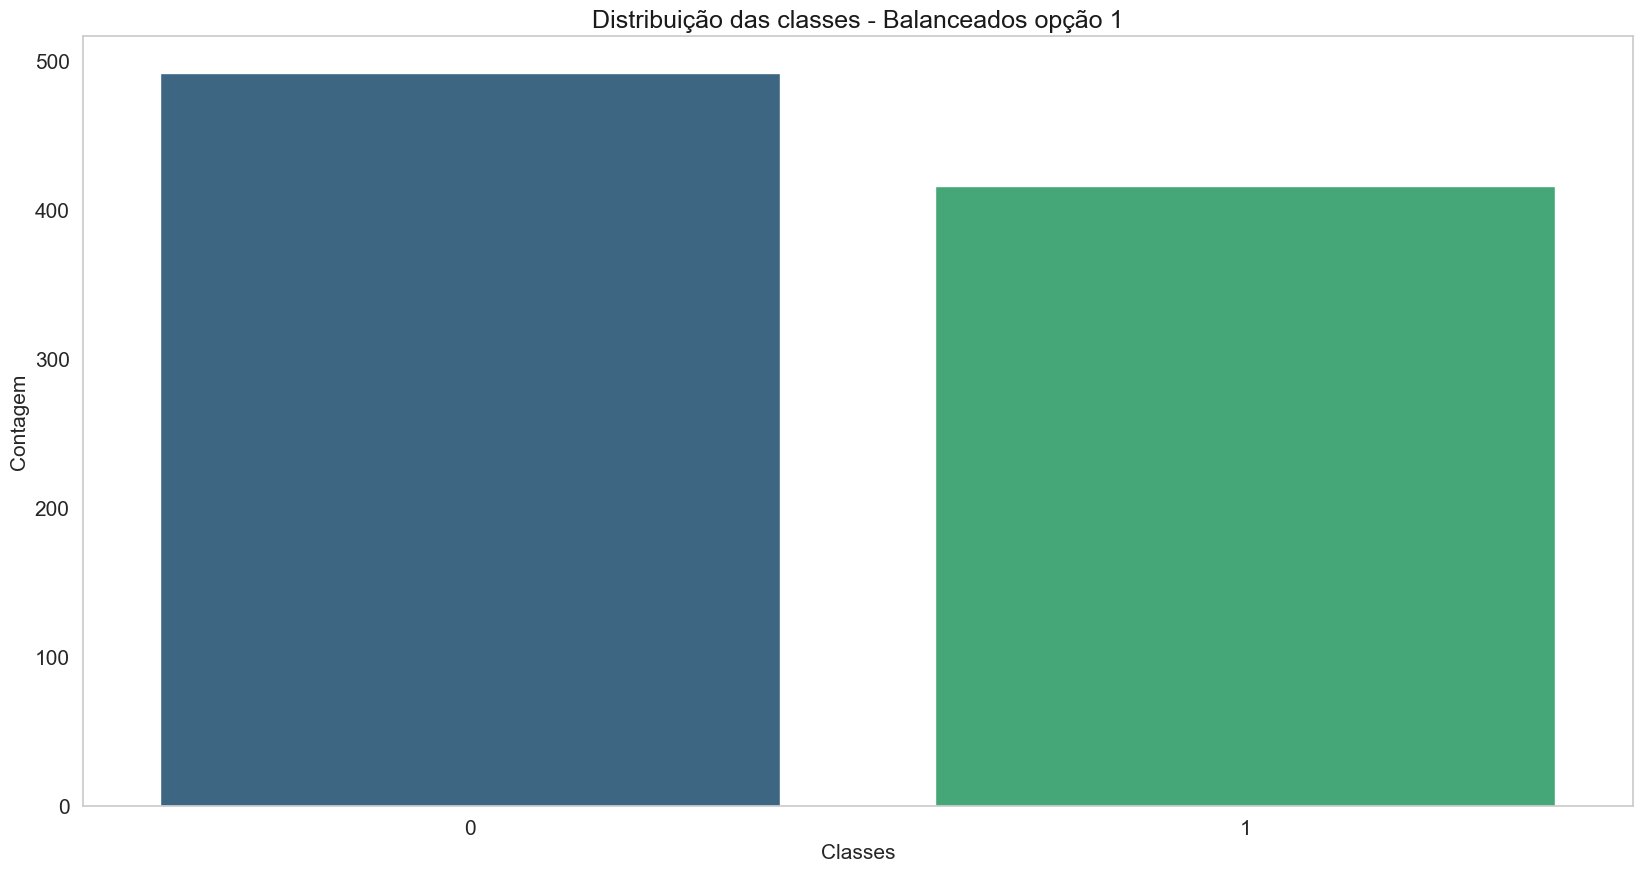

In [42]:
# Grafico barra coluna alvo
sns.countplot(x="Class", data=data_novos, palette='viridis')
plt.title('Distribuição das classes - Balanceados opção 1',fontsize=18)
plt.xlabel("Classes")
plt.ylabel("Contagem")
plt.grid(False)
plt.show()

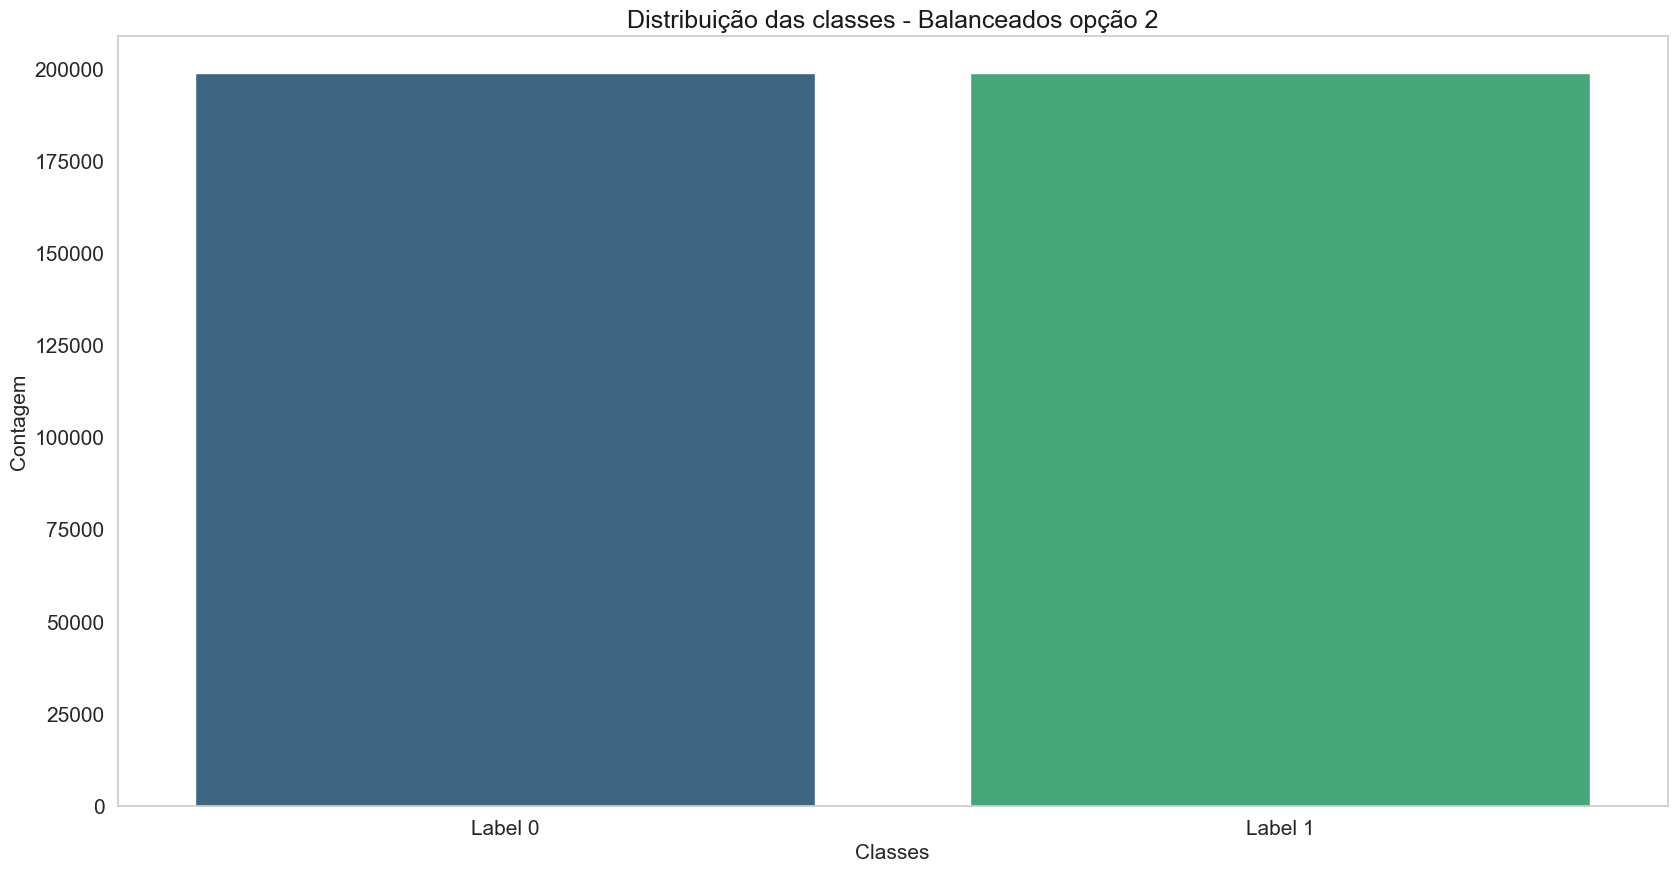

In [43]:
# Visualizando em grafico dados "Após a Sobreamostragem"

count_0 = sum(y_train_resp == 0)
count_1 = sum(y_train_resp == 1)

data = {'Class': ['Label 0', 'Label 1'], 
        'Count': [count_0, count_1]}

df = pd.DataFrame(data)

sns.barplot(x='Class', y='Count', data=df, palette='viridis')
plt.title('Distribuição das classes - Balanceados opção 2',fontsize=18)
plt.xlabel("Classes")
plt.ylabel("Contagem")
plt.grid(False)
plt.show()

In [44]:
# Importando biblioteca
import joblib

# # Salvar o modelo score smote em um arquivo .pkl
joblib.dump(pre_smote, "Modelo_pre_smote.pkl")

['Modelo_pre_smote.pkl']

# Referencia

Carlos Bonfim - "Modelo Preditivo para Detecção de Fraudes" 
- Link: https://carlos-bonfim.medium.com/modelo-preditivo-para-detec%C3%A7%C3%A3o-de-fraudes-a3ec4ce54497

Documentação oficial da biblioteca Imbalanced-learn sobre a técnica SMOTE 
- Link: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

Cory Maklin - "Synthetic Minority Over-sampling Technique (SMOTE)" 
- Link: https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

Jason Brownlee - "SMOTE for Imbalanced Classification with Python" 
- Link: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Esses são os links fornecidos como referência para o modelo preditivo de detecção de fraudes e para entender melhor a técnica de sobre-amostragem SMOTE.